In [4]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.2 MB/s eta 0:00:00


In [1]:

import pandas as pd
import numpy as np
from numpy import where
import csv

import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc


from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import plotly.offline as pyo
from collections import Counter


from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings(action='ignore')
from tabulate import tabulate

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier ,ExtraTreesClassifier
from xgboost import XGBClassifier,plot_tree
from lightgbm import LGBMClassifier
import catboost as cb
from catboost import CatBoostClassifier,Pool
import optuna
from optuna.integration import CatBoostPruningCallback
import xgboost as xgb

from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

In [3]:
import time

In [4]:
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.metrics import classification_report, confusion_matrix, log_loss

In [5]:
from hyperopt import fmin, tpe, hp, rand, Trials, STATUS_OK

In [5]:
import pickle

In [6]:
from IPython.display import Image

from google.colab import files
uploaded = files.upload()

In [7]:
data = pd.read_csv('second.csv')
data

gender  age  hypertension  heart_disease  ever_married  Residence_type  \
0           0    3             0              0             0               0   
1           0   58             1              0             1               1   
2           1    8             0              0             1               1   
3           1   70             0              0             0               0   
4           1   52             0              0             1               1   
...       ...  ...           ...            ...           ...             ...   
34607       1   10             0              0             1               1   
34608       1   56             0              0             1               1   
34609       1   82             1              0             1               1   
34610       0   40             0              0             1               1   
34611       1   82             0              0             1               1   

       avg_glucose_level  bmi  stroke  formerly smoked  never smoked  smokes  \
0                     95   18       0                0             1       0   
1                     87   39       0                0             1       0   
2                    110   17       0                0             1       0   
3                     69   35       0                1             0       0   
4                     77   17       0                1             0       0   
...                  ...  ...     ...              ...           ...     ...   
34607                 58   20       0                0             1       0   
34608                213   55       0                1             0       0   
34609                 91   28       0                1             0       0   
34610                 99   33       0                0             1       0   
34611                 79   20       0                0             1       0   

       work_Govt_job  work_Never_worked  work_Private  work_Self-employed  \
0                  0                  0             0                   0   
1                  0                  0             1                   0   
2                  0                  0             1                   0   
3                  0                  0             1                   0   
4                  0                  0             1                   0   
...              ...                ...           ...                 ...   
34607              0                  0             0                   0   
34608              1                  0             0                   0   
34609              0                  0             1                   0   
34610              0                  0             1                   0   
34611              0                  0             1                   0   

       work_children  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
34607              1  
34608              0  
34609              0  
34610              0  
34611              0  

[34612 rows x 17 columns]

## Train-Test Split

In [8]:
y = data['stroke']
X = data.drop('stroke', axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [10]:
y_test

17561    0
30884    0
251      0
30728    0
22327    0
        ..
22524    0
5511     0
26349    0
1266     0
33675    0
Name: stroke, Length: 6923, dtype: int64

**Random_state** – это параметр, который позволяет установить начальные условия для генерации случайных чисел. Он используется для получения повторяемых результатов в тех случаях, когда необходимо произвести несколько экспериментов с одним и тем же набором данных. При этом может быть установлено любое исходное значение для данного параметра.

Суть параметра **random_state** (во всех функциях и методах из SciKit-Learn) в воспроизводимых случайных значениях. Т.е. если явно задать значение random_state отличным от None - то генерируемые псевдослучайные величины будут иметь одни и те же значения при каждом вызове.

In [11]:
#counter = y_train.value_counts()
#counter
# summarize class distribution
cou = Counter(y_train)
cou

Counter({0: 27187, 1: 502})

## Feature Scaling

возможно, потребуется масштабировать(стандартизация или нормализация) перед использованием в методах машинного обучения,особенно для  таких как линейная регрессия, логистическая регрессия, нейронные сети, которые используют градиентный спуск в качестве стратегии оптимизации.
Изменение масштаба данных может осуществляться двумя способами: стандартизацией и нормализацией.
Техника масштабирования**: нормализац**ия изменяет масштаб данных так, чтобы данные находились в диапазоне от 0 до 1 (масштабирование Min-Max
).
Набор данных масштабируется посредств**ом стандартиза**ции, имеет среднее значение = 0 и стандартное отклонение = 1.                            std_per_feature =X_train.std()
print(std_per_feature)


***Масштабирование или стандартизация данных***. Это этап предварительной обработки данных, который применяется к независимым переменным или функциям данных. Это в основном помогает нормализовать данные в определенном диапазоне. Иногда это также помогает ускорить вычисления в алгоритме.
Каждый метод масштабирования имеет свои преимущества и ограничения, и не существует метода, подходящего для любой ситуации. Нам следует понять каждый метод, реализовать его и посмотреть, какой из них лучше всего подходит для конкретной проблемы.

***StandardScaler()*** преобразует данные таким образом, что их распределение будет иметь среднее значение 0 и стандартное отклонение 1. Это делается путем вычитания среднего значения каждого признака и деления на его стандартное отклонение.

Применение StandardScaler() помогает алгоритмам машинного обучения работать лучше, особенно если у признаков разные диапазоны значений. Масштабирование признаков позволяет моделям лучше справляться с данными, так как оно делает их более сопоставимыми и улучшает сходимость алгоритмов.

In [12]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)



In [13]:
#X_train_sc

In [14]:
#X_test_sc

In [15]:
#std_per_feature = X_train_sc.std()
#print(std_per_feature)

In [16]:
mean_per_feature = X_train_sc.mean()
print(mean_per_feature)

-1.1627891117096877e-18


In [17]:
print(len(X_train_sc))
print(len(X_test_sc))

27689
6923


##  Random Oversampling
Random Oversampling увеличивает количество образцов в минорном классе, создавая дополнительные копии существующих образцов этого класса. Процесс заключается в нескольких шагах:

Выбор образцов: Сначала метод идентифицирует минорный класс, в котором наблюдается дисбаланс. Затем из этого класса случайным образом выбираются образцы, которые будут скопированы.

Копирование образцов: Выбранные образцы из минорного класса копируются, чтобы увеличить количество представителей этого класса в данных. Новые копии добавляются в исходный датасет.

Балансировка классов: Процесс повторяется до тех пор, пока соотношение между классами не станет более сбалансированным или пока не будет достигнуто желаемое соотношение между кла

Установка желаемого соотношения между классами при использовании метода Random Oversampling зависит от конкретной задачи и желаемого уровня баланса классов в данных.

Если вы хотите установить конкретное соотношение между классами, вам нужно решить, какое именно соотношение вам требуется. Например, вы можете хотеть сбалансировать классы так, чтобы количество образцов в минорном классе было равно количеству образцов в мажорном классе, или установить другое желаемое отношение.

ссами.
книга: brownlee_jason_imbalanced_classification_with_python_better  стр 113....

In [18]:


print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

oversample = RandomOverSampler(random_state=42,sampling_strategy='minority')
X_train_over, y_train_over = oversample.fit_resample(X_train_sc, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_over==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_over==0)))

Before OverSampling, counts of label '1': 502
Before OverSampling, counts of label '0': 27187 

After OverSampling, the shape of train_X: (54374, 16)
After OverSampling, the shape of train_y: (54374,) 

After OverSampling, counts of label '1': 27187
After OverSampling, counts of label '0': 27187


## Ансамблевые методы в машинном обучении - это методы, которые объединяют несколько моделей для решения задачи. Они строят не одну, а несколько моделей и объединяют их результаты для получения более точных и стабильных предсказаний или классификаций.

Методы бэггинга (bagging) используют множество случайных подмножеств обучающих данных для обучения разных моделей и затем усредняют их предсказания.

1. **Random Forest** - это метод бэггинга (bagging), который основан на использовании ансамбля решающих деревьев. При Random Forest создается множество решающих деревьев, каждое из которых обучается на случайном подмножестве данных и признаков, после чего результаты этих деревьев усредняются для получения окончательного предсказания.

Благодаря случайному выбору подмножества данных и признаков при построении каждого дерева, Random Forest обеспечивает разнообразие моделей и уменьшает переобучение, делая его эффективным методом для работы с широким спектром задач обучения с учителем.

2. **Bagged Decision Trees:** Это базовый метод бэггинга, где используются решающие деревья. Каждое дерево обучается на различном подмножестве данных (путем выбора с повторениями) и затем усредняет свои предсказания.

3. **Bagged SVM** (Support Vector Machines): Использование бэггинга с SVM. Каждая модель SVM обучается на случайном подмножестве данных, после чего их результаты усредняются.

4. **Bagged Neural Networks:** Бэггинг применительно к нейронным сетям. Каждая нейронная сеть обучается на своем подмножестве данных, а затем их результаты комбинируются.

5. **Bagged k-Nearest Neighbors (k-NN):** Применение бэггинга к методу k-NN. Каждая модель k-NN обучается на случайном подмножестве данных и затем их предсказания объединяются.

Бустинг (boosting) строит последовательность моделей, каждая из которых исправляет ошибки предыдущей, улучшая общую производительность.
1. **CatBoost:** Это градиентный бустинговый алгоритм, специально оптимизированный для работы с категориальными признаками. Он автоматически обрабатывает категориальные данные и может достигать высокой производительности без особых предварительных настроек.

2. **XGBoost:** Экстремальный градиентный бустинг (XGBoost) — это алгоритм градиентного бустинга, который обладает высокой производительностью и эффективностью. Он часто используется в соревнованиях по машинному обучению и широко применяется в практике из-за своей точности.

3. **AdaBoost:** Этот метод использует адаптивное взвешивание (Adaptive Boosting) для обучения последовательности слабых моделей (например, деревьев решений) с фокусом на улучшении ошибок предыдущих моделей.

4. **Gradient Boosting Machines (GBM):** Это общее название для алгоритмов, которые пошагово строят ансамбль слабых моделей (обычно деревьев решений) и корректируют их ошибки, фокусируясь на тех примерах, на которых предыдущие модели ошиблись.

5. **LightGBM:** Это еще один градиентный бустинговый алгоритм, который обеспечивает высокую скорость работы за счет оптимизации структуры деревьев и эффективной обработки больших объемов данных.
назаний.еревьям.

**fit_time** и **score_time** отражают время, затраченное на обучение модели и время, затраченное на оценку каждой модели на каждой итерации кросс-валидации соответственно.

**Macro Average (макро-среднее)**: Это среднее значение, которое вычисляется путем усреднения метрик (точность, полнота, F1-мера и т.д.), рассчитанных независимо для каждого класса, без учета дисбаланса классов. Каждый класс вносит равный вклад в итоговое среднее значение, независимо от количества его экземпляров (support).
**
Weighted Avera**ge (взвешенное среднее): Это среднее значение, рассчитанное путем усреднения метрик с учетом весов, которые определяются количеством экземпляров в каждом классе (support). Таким образом, классы с большим количеством экземпляров имеют более значимое влияние на итоговую метрику, чем классы с меньшим числом экземпляров. Это позволяет лучше учесть дисбаланс классов при оценке производительности модели по нескольким класса


**Macro Average (макро-среднее):**

Precision (точность): 0.51  
Recall (полнота): 0.52  
F1-score: 0.51  

Это означает, что если взять среднее значение precision, recall и F1-score по всем классам (вне зависимости от их размера или поддержки), то они будут равны указанным числам (в данном случае, около 0.51-0.52).

**Weighted Average (взвешенное среднее):**

Precision (точность): 0.96  
Recall (полнота): 0.95  
F1-score: 0.95  

Эти значения представляют взвешенное среднее, где каждый класс вносит вклад в соответствии с его размером (количеством экземпляров). Это означает, что модель имеет очень высокие показатели точности, полноты и F1-меры для средневзвешенных результатов.

Итак, модель имеет относительно низкие значения макро-среднего (учитывая все классы равноправно) и высокие значения взвешенного среднего (учитывая размеры классов) по precision, recall и F1-score на данном наборе данных.м.

# Random Oversampling

## 1. BOOSTING

### Кросс-Валидация

In [17]:

list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

fit_time  score_time  accuracy  precision  \
CatBoostClassifier          40.878965    0.049700  0.973443   0.974787   
AdaBoostClassifier           1.602201    0.038514  0.780134   0.783522   
XGBClassifier                0.647813    0.017302  0.967632   0.969609   
LGBMClassifier               0.945132    0.017201  0.927557   0.935823   
GradientBoostingClassifier   4.937207    0.015702  0.813606   0.818541   

                              recall        f1  
CatBoostClassifier          0.973443  0.973424  
AdaBoostClassifier          0.780134  0.779474  
XGBClassifier               0.967632  0.967597  
LGBMClassifier              0.927557  0.927210  
GradientBoostingClassifier  0.813606  0.812882

## 1. Прогнозирование с  CatBoostClassifier

Модель **cat_model** с параметрами по умолчанию показывае лучший результат

*CatBoostClassifier learning_rate: The default learning rate is typically set to 0.03.

depth: The default maximum tree depth is typically set to 6.

iterations: The default number of boosting iterations is typically set to 1000.

l2_leaf_reg: The default L2 regularization term is typically set to 3.

border_count: The default number of splits for numerical features is typically set to 254.
scale_pos_weight=20  random_state=79 0.54

The CatBoostClassifier() from the CatBoost library. By ***default, the random_state parameter in CatBoostClassifier() is set to None***.
This means that each time the algorithm is run, it can produce different results because of the random seed used in various parts of the algorithm, particularly during splitting. To get reproducible results, you can set random_state to a fixed integer value.







MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Fit Time: 6.8071 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      6787
           1       0.09      0.24      0.13       136

    accuracy                           0.94      6923
   macro avg       0.54      0.60      0.55      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6467  320]
 [ 103   33]]


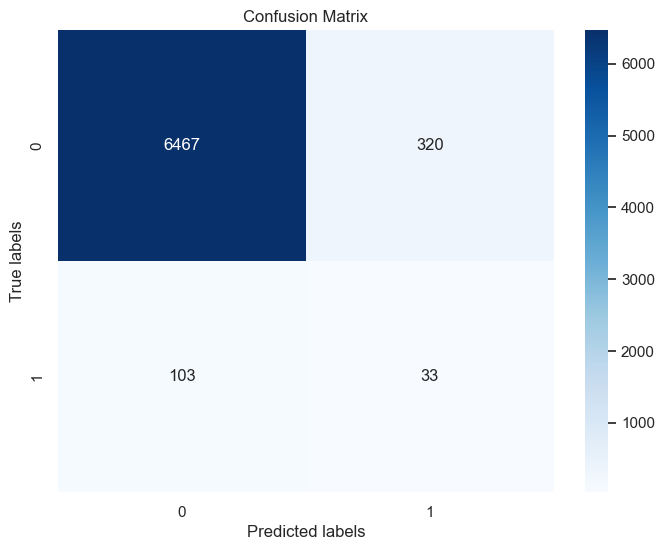

In [21]:

# Start measuring time
start_time = time.time()

# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False,random_state=42).fit(X_train_over, y_train_over,plot=True,  verbose=False)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")



# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [22]:

# Получение предсказанных вероятностей для каждого класса
y_cat =cat_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_cat_class_1 = y_cat[:, 1]

# Расчет AUC-ROC
auc = roc_auc_score(y_test,y_cat_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.7814983662538244


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Fit Time: 19.0616 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.10      0.24      0.14       136

    accuracy                           0.94      6923
   macro avg       0.54      0.60      0.56      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6505  282]
 [ 104   32]]


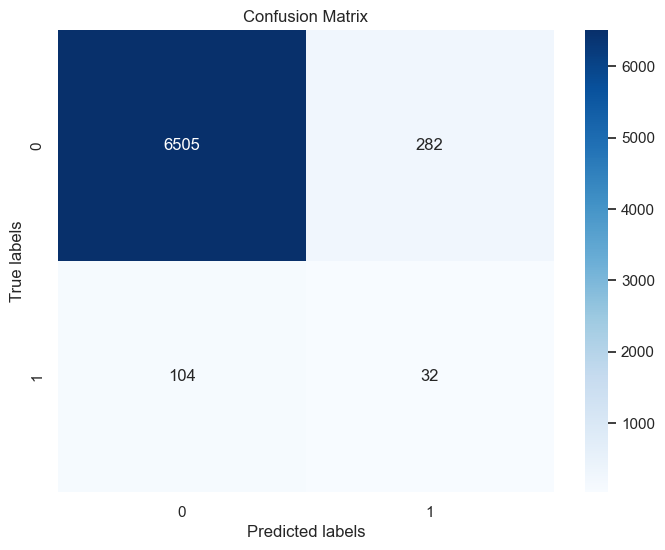

In [23]:
# Обучение модели ансамбля
# Start measuring time
start_time = time.time()
cat_model_1 = CatBoostClassifier(iterations=3000,verbose=False).fit(X_train_over, y_train_over,plot=True,  verbose=False)

# Предсказание на тестовой выборке
y_pred = cat_model_1.predict(X_test_sc)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")


# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Получение предсказанных вероятностей для каждого класса
y_pr_prob =cat_model_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pr_prob_class_1 = y_pr_prob[:, 1]


In [25]:
# Расчет AUC-ROC
auc = roc_auc_score(y_test, y_pr_prob_class_1)
print(f"AUC-ROC_1: {auc}")

AUC-ROC_1: 0.782047642985292


### Функция по запросу важности признаков

In [21]:
# Get the feature importances
feature_importances = cat_model_1.get_feature_importance()

# Get the feature names
feature_names = cat_model_1.feature_names_

# Create a dictionary mapping feature names to their importances
feature_importance_dict = {feature_names[i]: importance for i, importance in enumerate(feature_importances)}

# Print the feature importances with their names
for feature, importance in sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True):
    print(f"{feature}: {importance:.4f}")

6: 29.0509
1: 26.5029
7: 19.1595
0: 3.7287
9: 3.0110
13: 2.5069
8: 2.2587
11: 2.2582
4: 2.2535
2: 2.2095
10: 2.1619
5: 1.6442
14: 1.6082
3: 1.4252
15: 0.2180
12: 0.0027


In [22]:
import catboost

In [23]:
pool = catboost.Pool(data=X_train_over, 
    label=y_train_over)


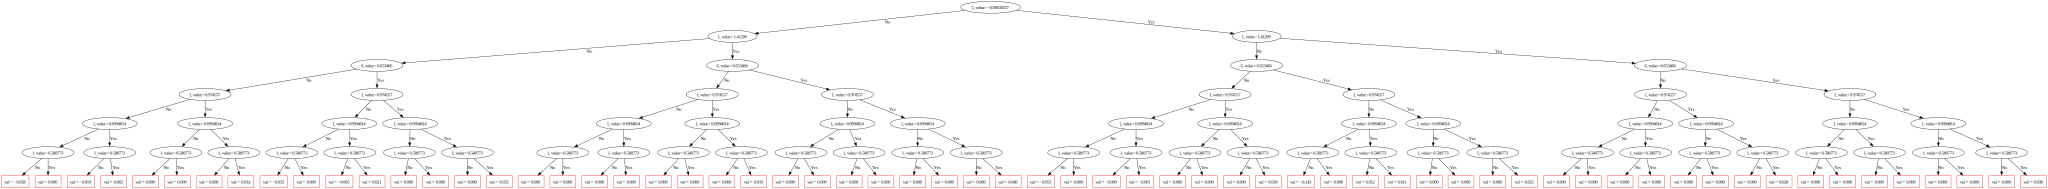

In [24]:
cat_model_1.plot_tree(
    tree_idx=0,
    # pool=pool, 
)

# Оптимизация гиперпараметров hyperparameters tuning

***Method Optuna** is a famous hyperparameter optimization framework.
https://optuna.org/

https://optuna.readthedocs.io/en/stable/reference/optuna.html

Optuna enables efficient hyperparameter optimization by adopting state-of-the-art algorithms for sampling hyperparameters and pruning efficiently unpromising trials.

## Optuna: Оптимизация Гиперпараметров в Машинном Обучении

**Optuna** — это популярная открытая библиотека, разработанная на языке Python, предназначенная для автоматизации процесса поиска наилучших гиперпараметров для алгоритмов машинного обучения. Вот ключевые особенности и аспекты использования Optuna:

## Основные Характеристики
- **Простота использования**: Optuna предлагает простой и удобный интерфейс для определения пространства поиска гиперпараметров.
- **Эффективность**: Использует эффективные алгоритмы оптимизации, такие как Tree-structured Parzen Estimator (TPE), CMA-ES и другие.
- **Гибкость**: Позволяет оптимизировать гиперпараметры различных типов, включая целые числа, действительные числа и категории.
- **Визуализация**: Включает инструменты для визуализации процесса оптимизации, облегчая понимание результатов и принятие обоснованных решений.

## Основные Компоненты
- **Study**: Объект, управляющий процессом оптимизации и отслеживающий все пробы и их результаты.
- **Trial**: Одна итерация в процессе оптимизации, где модель обучается и оценивается с определенным набором гиперпараметров.
- **Objective Function**: Функция, определенная пользователем, возвращающая числовую метрику для оценки качества модели.

## Процесс Оптимизации
1. **Определение функции objective**: Пользователь определяет функцию, которая принимает объект Trial и возвращает метрику для оптимизации.
2. **Запуск оптимизации**: Создание объекта Study и вызов метода `optimize` с функцией objective и указанием количества проб.
3. **Выбор лучших параметров**: По завершении проб Optuna предоставляет лучшие найденные параметры.

## Визуализация и Анализ
Optuna предлагает функции визуализации, такие как отображение истории оптимизации, распределения гиперпараметров и их влияние на производительность модели.

## Применение
Широко используется для оптимизации моделей в области машинного обучения, включая нейронные сети, ансамбли деревьев решений и другие алгоритмы.

## Интеграция
Легко интегрируется с популярными фреймворками машинного обучения, такими как TensorFlow, PyTorch, Scikit-learn и другими.

Optuna является мощным и гибким инструментом, помогающим исследователям и инженерам эффективно находить оптимальные гиперпараметры для своих моделей машинного обучения.

### Гиперпараметры для CatBoost

https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier

**Итерация-** представляет собой один проход по всему набору данных (эпоху) при обучении.

Число итераций ('iterations') является одним из ключевых гиперпараметров в CatBoost и влияет на процесс обучения и сложность модели. Чем больше итераций, тем больше шансов модель имеет для обучения на тренировочных данных, но при этом она также может столкнуться с риском переобучения, если слишком много итераций используется без необходимости.

Обычно значение 'iterations' выбирается в зависимости от конкретной задачи и может потребовать настройки и оптимизации. Важно балансировать между достаточным количеством итераций для достижения хорошей обобщающей способности модели и избегания переобучения.

**'depth'** в CatBoost - это гиперпараметр, который определяет максимальную глубину деревьев, используемых в ансамбле CatBoost. Глубина дерева указывает, на сколько уровней вниз модель будет разделять данные при обучении. Увеличение значения 'depth' позволяет модели создавать более сложные и глубокие деревья, что может помочь в захвате более сложных зависимостей в данных.

Однако важно понимать, что увеличение глубины деревьев может также привести к переобучению модели, особенно если у вас ограничен объем данных. Поэтому выбор оптимального значения 'depth' должен быть сбалансированным и основываться на конкретной задаче и наборе данных.

Важно экспериментировать с различными значениями 'depth' и использовать методы кросс-валидации и оценки производительности модели для определения наилучшей глубины деревьев для вашей конкретной задачи

Стоит отметить, что более **неглубокие деревья** могут иногда лучше обобщать на **несбалансированных тестовых данных**.

**'Learning rate'** (скорость обучения) в CatBoost - это гиперпараметр, который определяет размер шага, с которым модель обновляет веса (коэффициенты) при обучении. Он также называется learning rate или шаг обучения. Скорость обучения контролирует, насколько быстро или медленно модель адаптируется к данным в процессе обучения.

Высокое значение скорости обучения (близкое к 1) означает, что модель будет быстро адаптироваться к данным, но при этом есть риск переобучения и нестабильности обучения. Низкое значение скорости обучения (близкое к 0) делает обучение более стабильным, но может потребовать большего числа итераций для достижения сходимости.

Оптимальное значение скорости обучения зависит от конкретной задачи и набора данных, и его выбор может потребовать настройки и оптимизации в процессе обучения модели. Обычно начинают с небольших значений (например, 0.01) и, если необходимо, увеличивают или уменьшают в соответствии с результатами валидации модели.

**'l2_leaf_reg'** Этот параметр контролирует степень регуляризации L2 для листьев деревьев. Увеличение l2_leaf_reg усиливает регуляризацию, что может помочь в борьбе с переобучением.

Так как обучающий набор данных сбалансирован с помощью метода Random Oversampling, но тестовый набор несбалансирован, важно обеспечить, чтобы модель не только хорошо обучалась на сбалансированных данных, но и адекватно работала на несбалансированных тестовых данных. В этом контексте, следующие дополнительные гиперпараметры могут быть особенно полезны:

**auto_class_weights:** Учитывая, что тестовый набор данных несбалансирован, настройка весов классов может помочь улучшить производительность на миноритарных классах. **auto_class_weights** автоматически настраивает веса в зависимости от частоты классов, что может быть полезно.

**min_child_samples:** Этот параметр помогает предотвратить создание слишком специфичных правил, которые хорошо работают на обучающем наборе, но плохо обобщаются на тестовые данные. Увеличение этого значения может улучшить обобщающую способность модели.

**bagging_temperature:** Этот параметр контролирует степень случайности в процессе бэггинга. Он может помочь уменьшить переобучение и увеличить устойчивость модели.

***Прогнозирование f1_scores[1] с iterations= [500, 750, 1000] и с min_child_samples между  1 и 100*** 

In [15]:
def objective(trial):
    # Define the hyperparameter search space using the trial object
    ##Функции trial.suggest_int и trial.suggest_float используются для предложения целых
    #и чисел с плавающей запятой для гиперпараметров в указанных диапазонах.
    param = {
        #suggest_categorical:  выбирает одно из возможных значений гиперпараметра из списка.
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
         # Предлагаем целочисленное значение для гиперпараметра 'depth' между 10 и 15
        'depth': trial.suggest_int('depth', 6, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        # Предлагаем значение с плавающей запятой для гиперпараметра 'learning_rate' между 0.01 и 0.05
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),       
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    # Initialize the CatBoostClassifier with the suggested parameters
    model = CatBoostClassifier(**param)

    # Train the model
    model.fit(X_train_over, y_train_over)

    # Predict on the testing set
    preds = model.predict(X_test_sc)

    # Calculate the F1 score for each class
    f1_scores = f1_score(y_test, preds, average=None)

    # We're interested in the F1 score for class 1
    f1_class_1 = f1_scores[1]

    return f1_class_1
# Create an Optuna study object and specify the direction is 'maximize' since we want to maximize the F1 score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # You can specify the number of trials
print(study.best_trial)

# After the optimize function completes, you can get the best set of hyperparameters
best_params = study.best_trial.params

# Create the best model
best_model = CatBoostClassifier(**best_params, task_type='GPU', devices='0:1', verbose=False)
best_model.fit(X_train_over, y_train_over)

# You can now evaluate the best_model on your test set, save it, or do anything else you need macro avg    

[I 2024-01-16 18:33:06,193] A new study created in memory with name: no-name-b8a45343-0dfb-4f48-8709-9ab748698f42
[I 2024-01-16 18:33:14,804] Trial 0 finished with value: 0.11837237977805179 and parameters: {'iterations': 1000, 'auto_class_weights': None, 'depth': 6, 'min_child_samples': 76, 'learning_rate': 0.04810756319860492, 'bagging_temperature': 6.5993126463657585, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.11837237977805179.
[I 2024-01-16 18:33:23,486] Trial 1 finished with value: 0.1134020618556701 and parameters: {'iterations': 1000, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 91, 'learning_rate': 0.03756343570790192, 'bagging_temperature': 7.601749692454907, 'l2_leaf_reg': 3}. Best is trial 0 with value: 0.11837237977805179.
[I 2024-01-16 18:33:29,855] Trial 2 finished with value: 0.1277056277056277 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 95, 'learning_rate': 0.020887782738014376, 

FrozenTrial(number=57, state=TrialState.COMPLETE, values=[0.14392059553349879], datetime_start=datetime.datetime(2024, 1, 16, 18, 40, 46, 122084), datetime_complete=datetime.datetime(2024, 1, 16, 18, 40, 53, 757150), params={'iterations': 1000, 'auto_class_weights': None, 'depth': 6, 'min_child_samples': 15, 'learning_rate': 0.026767776946397436, 'bagging_temperature': 0.6952823605879357, 'l2_leaf_reg': 2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'iterations': CategoricalDistribution(choices=(500, 750, 1000)), 'auto_class_weights': CategoricalDistribution(choices=(None, 'Balanced', 'SqrtBalanced')), 'depth': IntDistribution(high=10, log=False, low=6, step=1), 'min_child_samples': IntDistribution(high=100, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=0.05, log=False, low=0.01, step=None), 'bagging_temperature': FloatDistribution(high=10.0, log=False, low=0.0, step=None), 'l2_leaf_reg': IntDistribution(high=5, log=False, low=1, step=1)

In [57]:
best_params

{'iterations': 1000,
 'auto_class_weights': 'Balanced',
 'depth': 7,
 'min_child_samples': 56,
 'learning_rate': 0.021249220135342372,
 'bagging_temperature': 0.5736661290941693,
 'l2_leaf_reg': 3}

In [21]:
# Best hyperparameters from tuning
best_params = {
    'iterations': 1000,
    'auto_class_weights': 'Balanced',
    'depth': 7,
    'min_child_samples': 56,
    'learning_rate': 0.021249220135342372,
    'bagging_temperature': 0.5736661290941693,
    'l2_leaf_reg': 3
}


# Create the best model with the optimal hyperparameters and additional parameters for GPU usage
best_model = CatBoostClassifier(**best_params, task_type='GPU', devices='0:1', verbose=False)
# Start measuring time
start_time = time.time()

# Fit the model to your oversampled training data
best_model.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.4f} seconds")



Fit Time: 7.9706 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6787
           1       0.09      0.38      0.15       136

    accuracy                           0.91      6923
   macro avg       0.54      0.65      0.55      6923
weighted avg       0.97      0.91      0.94      6923

Confusion Matrix:
[[6282  505]
 [  84   52]]


Text(67.25, 0.5, 'True labels')

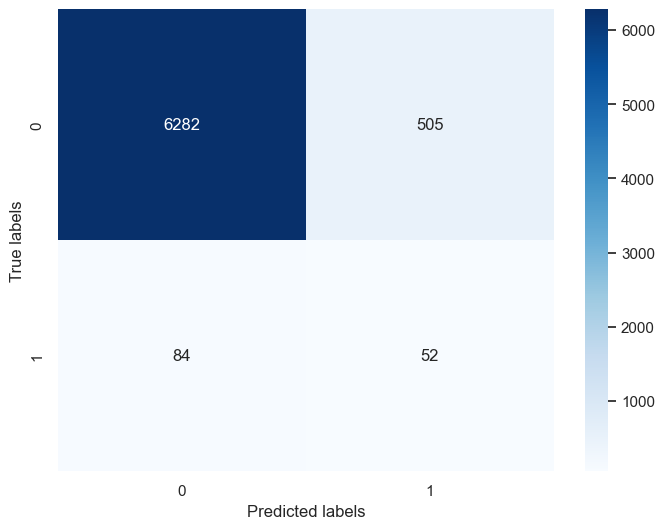

In [22]:
# Предсказание на тестовой выборке
y_pred =best_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')


In [23]:
# Получение предсказанных вероятностей для каждого класса
y_pred_pr = best_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_pr_class_1 = y_pred_pr[:, 1]


In [24]:
# Расчет AUC-ROC
auc = roc_auc_score(y_test, y_pred_pr_class_1)
print(f"AUC-ROC_1: {auc}")


AUC-ROC_1: 0.7975779821284635


The **devices='0:1'** setting tells CatBoost to use GPU devices 0 and 1 for training. This means that the training process will utilize both GPU devices 0 and 1 for parallel processing, which can potentially speed up training for large datasets and complex models.

If you have multiple GPUs in your system and you want to control which GPUs are used for training, you can specify them using the devices parameter. The GPU devices are typically indexed starting from 0. In the example, devices='0:1' indicates the use of GPUs 0 and 1. You can customize this setting based on your hardware configuration and requirements.

***Прогнозирование f1_scores[1] с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 200***



In [36]:
def objective(trial):
    # Define the hyperparameter search space using the trial object
    ##Функции trial.suggest_int и trial.suggest_float используются для предложения целых
    #и чисел с плавающей запятой для гиперпараметров в указанных диапазонах.
    param = {
        #suggest_categorical:  выбирает одно из возможных значений гиперпараметра из списка.
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000,2000,3000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
         # Предлагаем целочисленное значение для гиперпараметра 'depth' между *** и ***
        'depth': trial.suggest_int('depth', 7, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 200),
        # Предлагаем значение с плавающей запятой для гиперпараметра 'learning_rate' между 0.01 и 0.05
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.05),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),       
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    # Initialize the CatBoostClassifier with the suggested parameters
    model = CatBoostClassifier(**param)

    # Train the model
    model.fit(X_train_over, y_train_over)

    # Predict on the testing set
    preds = model.predict(X_test_sc)

    # Calculate the F1 score for each class
    f1_scores = f1_score(y_test, preds, average=None)

    # We're interested in the F1 score for class 1
    f1_class_1 = f1_scores[1]

    return f1_class_1
# Create an Optuna study object and specify the direction is 'maximize' since we want to maximize the F1 score
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=200)  # You can specify the number of trials

# After the optimize function completes, you can get the best set of hyperparameters
best_params_1 = study_1.best_trial.params
print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Alternatively, you can directly print the best parameters and the best score
print("\nBest trial parameters: ", study_1.best_params)
print("Best trial F1  f1_class_1 score: ", study_1.best_value)



# Create the best model
best_model_1 = CatBoostClassifier(**best_params_1, task_type='GPU', devices='0:1', verbose=False)
best_model_1.fit(X_train_over, y_train_over)

# You can now evaluate the best_model on your test set, save it, or do anything else you need macro avg    

[I 2024-01-07 15:59:28,284] A new study created in memory with name: no-name-ea4c54c3-e618-4a29-a75b-ba6990a37be9
[I 2024-01-07 15:59:41,549] Trial 0 finished with value: 0.039840637450199196 and parameters: {'iterations': 750, 'auto_class_weights': None, 'depth': 10, 'min_child_samples': 196, 'learning_rate': 0.03018136170786264, 'bagging_temperature': 0.8332965104464263, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.039840637450199196.
[I 2024-01-07 15:59:47,243] Trial 1 finished with value: 0.1384180790960452 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 127, 'learning_rate': 0.025666732426801946, 'bagging_temperature': 2.005525096538064, 'l2_leaf_reg': 2}. Best is trial 1 with value: 0.1384180790960452.
[I 2024-01-07 16:00:09,811] Trial 2 finished with value: 0.10733452593917711 and parameters: {'iterations': 3000, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 58, 'learning_rate': 0.013183264783640

Best trial: 142
  Value: 0.5540253131437799
  Params: 
    iterations: 2000
    auto_class_weights: None
    depth: 7
    min_child_samples: 168
    learning_rate: 0.027205883677245454
    bagging_temperature: 8.173192899925498
    l2_leaf_reg: 4

Best trial parameters:  {'iterations': 750, 'auto_class_weights': 'SqrtBalanced', 'depth': 7, 'min_child_samples': 119, 'learning_rate': 0.01351906968112092, 'bagging_temperature': 2.5899058727119306, 'l2_leaf_reg': 2}
Best trial F1  f1_class_1 score:  0.14388489208633093


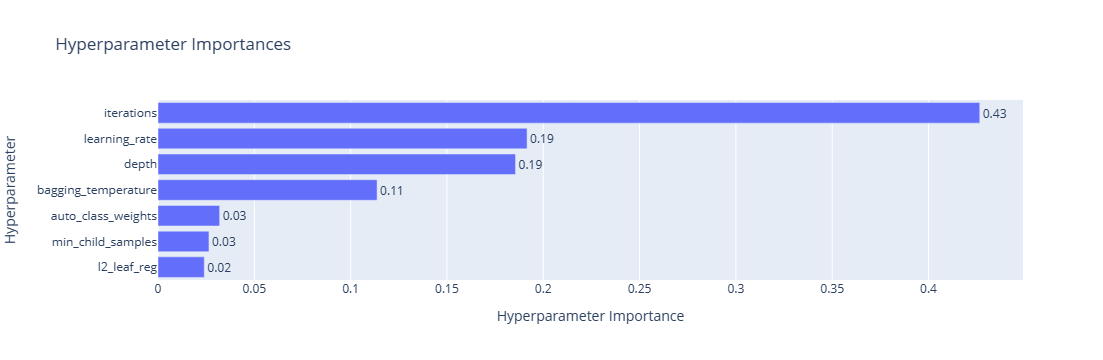

In [44]:
fig = optuna.visualization.plot_param_importances(study_1)
fig.show()

**Best is trial 115 with value:  0.14388489208633093**

best_params_1 = {'iterations': 750,

 'auto_class_weights': 'SqrtBalanced'
 ,
 'depth': 
 7,
 'min_child_samples': 1
 19,
 'learning_rate': 0.01351906968112
 092,
 'bagging_temperature': 2.589905872711
 9306,
 'l2_leaf_reg': 2}

In [43]:
best_params_1


{'iterations': 750,
 'auto_class_weights': 'SqrtBalanced',
 'depth': 7,
 'min_child_samples': 119,
 'learning_rate': 0.01351906968112092,
 'bagging_temperature': 2.5899058727119306,
 'l2_leaf_reg': 2}

In [25]:
# Best hyperparameters from tuning
best_params_1 = {
    'iterations': 750,
    'auto_class_weights': 'SqrtBalanced',
    'depth': 7,
    'min_child_samples': 119,
    'learning_rate': 0.01351906968112092,
    'bagging_temperature': 2.5899058727119306,
    'l2_leaf_reg': 2
}

# Create the best model with the optimal hyperparameters and additional parameters for GPU usage
best_model_1 = CatBoostClassifier(**best_params_1, task_type='GPU', devices='0:1', verbose=False)
# Start measuring time
start_time = time.time()
# Fit the model to your oversampled training data
best_model_1.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")



Fit Time: 6.0634768009 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      6787
           1       0.08      0.59      0.14       136

    accuracy                           0.86      6923
   macro avg       0.54      0.73      0.53      6923
weighted avg       0.97      0.86      0.91      6923

Confusion Matrix:
[[5891  896]
 [  56   80]]


Text(67.25, 0.5, 'True labels')

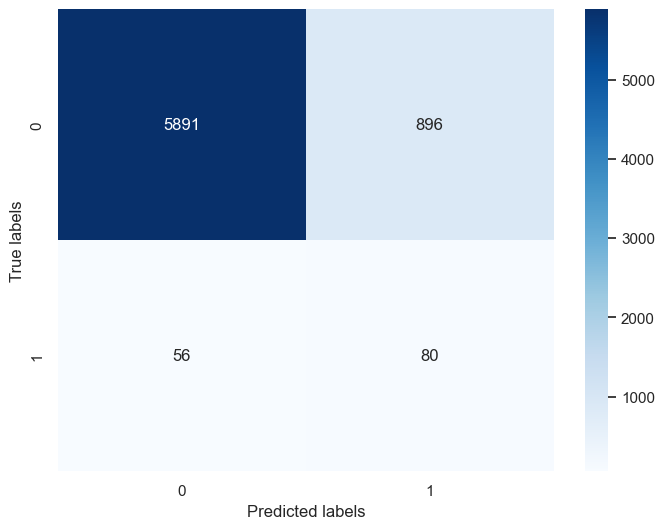

In [26]:
# Предсказание на тестовой выборке
y_pred_1 =best_model_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [32]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba_1 = best_model_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_1_class_1 = y_pred_proba_1[:, 1]

In [33]:
# Расчет AUC-ROC
auc_2 = roc_auc_score(y_test, y_pred_proba_1_class_1)
print(f"AUC-ROC_1: {auc_2}")


AUC-ROC_1: 0.8155372728139436


In [34]:
# Save the model
with open('best_model_1.pkl', 'wb') as file:
    pickle.dump(best_model_1, file)

In [35]:
# Load the model
with open('best_model_1.pkl', 'rb') as file:
    loaded_best_model_1 = pickle.load(file)

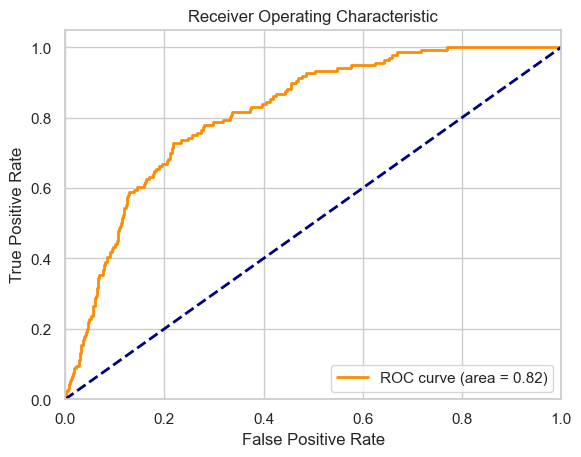

In [43]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_1_class_1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

***Прогнозирование f1_average macro с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300***

In [26]:
def objective(trial):
    # Define the hyperparameter search space using the trial object
    ##Функции trial.suggest_int и trial.suggest_float используются для предложения целых
    #и чисел с плавающей запятой для гиперпараметров в указанных диапазонах.
    param = {
        #suggest_categorical:  выбирает одно из возможных значений гиперпараметра из списка.
        'iterations': trial.suggest_categorical('iterations', [500, 750, 1000,2000,3000]),
        'auto_class_weights': trial.suggest_categorical('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
         # Предлагаем целочисленное значение для гиперпараметра 'depth' между *** и ***
        'depth': trial.suggest_int('depth', 7, 12),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        # Предлагаем значение с плавающей запятой для гиперпараметра 'learning_rate' между 0.01 и 0.05
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 10),
        'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 1, 5),       
        'task_type': 'GPU',
        'devices': '0:1',
        'verbose': False
    }

    # Initialize the CatBoostClassifier with the suggested parameters
    model = CatBoostClassifier(**param)

    # Train the model
    model.fit(X_train_over, y_train_over)

    # Predict on the testing set
    preds = model.predict(X_test_sc)

    # Calculate the F1 score for each class
    # Calculate the F1 score as the evaluation metric
    f1 = f1_score(y_test, preds, average='macro')

    return f1

   
# Create an Optuna study object and specify the direction is 'maximize' since we want to maximize the F1 score
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective, n_trials=300)  # You can specify the number of trials
# After the optimization is complete
best_trial = study_2.best_trial

print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Alternatively, you can directly print the best parameters and the best score
print("\nBest trial parameters: ", study_2.best_params)
print("Best trial F1 macro score: ", study_2.best_value)

# After the optimize function completes, you can get the best set of hyperparameters
best_params_2 = study_2.best_trial.params

# Create the best model
best_model_2 = CatBoostClassifier(**best_params_2, task_type='GPU', devices='0:1', verbose=False)
best_model_2.fit(X_train_over, y_train_over)

# You can now evaluate the best_model on your test set, save it, or do anything else you need macro avg    

[I 2024-01-07 14:15:04,719] A new study created in memory with name: no-name-d364a477-e537-4b5c-a840-277c51c1dafa
[I 2024-01-07 14:15:40,840] Trial 0 finished with value: 0.5132685274016978 and parameters: {'iterations': 750, 'auto_class_weights': 'Balanced', 'depth': 12, 'min_child_samples': 128, 'learning_rate': 0.049411953493815906, 'bagging_temperature': 5.950971377090317, 'l2_leaf_reg': 4}. Best is trial 0 with value: 0.5132685274016978.
[I 2024-01-07 14:16:35,359] Trial 1 finished with value: 0.4975596933630231 and parameters: {'iterations': 2000, 'auto_class_weights': 'Balanced', 'depth': 11, 'min_child_samples': 251, 'learning_rate': 0.08927226842245702, 'bagging_temperature': 7.299522899050585, 'l2_leaf_reg': 2}. Best is trial 0 with value: 0.5132685274016978.
[I 2024-01-07 14:16:57,352] Trial 2 finished with value: 0.5037227747794158 and parameters: {'iterations': 3000, 'auto_class_weights': 'Balanced', 'depth': 7, 'min_child_samples': 106, 'learning_rate': 0.0336933052313558

Best trial: 142
  Value: 0.5540253131437799
  Params: 
    iterations: 2000
    auto_class_weights: None
    depth: 7
    min_child_samples: 168
    learning_rate: 0.027205883677245454
    bagging_temperature: 8.173192899925498
    l2_leaf_reg: 4

Best trial parameters:  {'iterations': 2000, 'auto_class_weights': None, 'depth': 7, 'min_child_samples': 168, 'learning_rate': 0.027205883677245454, 'bagging_temperature': 8.173192899925498, 'l2_leaf_reg': 4}
Best trial F1 macro score:  0.5540253131437799


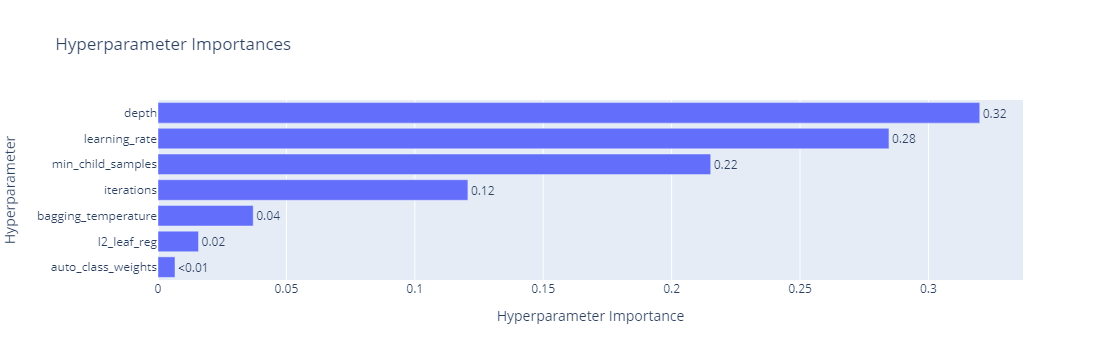

In [45]:
fig = optuna.visualization.plot_param_importances(study_2)
fig.show()

### Оптимальные Параметры После Оптимизации

Лучший результат был достигнут на пробе № *14287*** с результатом **F1 macro score: 0.4084**. Ниже представлены параметры, которые привели к этому результату:

- **Количество итераций**: 2000
- **Автоматический вес классов**: Нет (`None`)
- **Глубина дерева**: 7
- **Минимальное количество образцов в ли168**: 279
- **Скорость обу0.027205883677245454 0.01369
- **Температура бэггинга**: 1.703
- **L2-регуляризация4листа**: 2

Эти параметры были выявлены как наиболее эффективные для достижения оптимальной производительности модели в процессе гиперпараметрической оптимизации.

In [19]:
# Define the best trial parameters
best_params_2 = {
    'iterations': 2000, 
    'auto_class_weights': None, 
    'depth': 7, 
    'min_child_samples': 168, 
    'learning_rate': 0.027205883677245454, 
    'bagging_temperature': 8.173192899925498, 
    'l2_leaf_reg': 4
}

# Start measuring time
start_time = time.time()

# Create and fit the best model with the specified hyperparameters
best_model_2 = CatBoostClassifier(**best_params_2, task_type='GPU', devices='0:1', verbose=False)
best_model_2.fit(X_train_over, y_train_over)

# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 15.5460712910 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.10      0.23      0.14       136

    accuracy                           0.94      6923
   macro avg       0.54      0.59      0.55      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6502  285]
 [ 105   31]]


Text(67.25, 0.5, 'True labels')

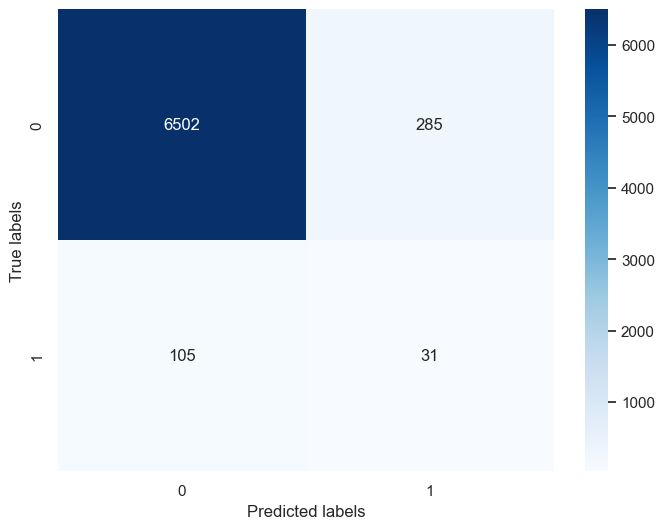

In [20]:
# Предсказание на тестовой выборке
y_pred_ =best_model_2.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

метод **predict_proba**

Метод **predict** возвращает только метки классов (например, 0 или 1 для бинарной классификации), 

в то время как **predict_proba** возвращает вероятности принадлежности к каждому классу.

Вероятность принадлежности к каждому классу в контексте машинного обучения – это оценка того, насколько вероятно, что данное наблюдение принадлежит к определенному классу. Это основа работы многих алгоритмов классификации.

Когда вы используете метод **predict_proba** в модели классификации, он возвращает массив, где каждая строка соответствует одному наблюдению (или объекту) из тестового набора данных, а столбцы соответствуют вероятностям принадлежности этого наблюдения к каждому из классов.

Например, если у вас есть бинарная классификация (с классами 0 и 1), и метод predict_proba возвращает для одного наблюдения массив [0.7, 0.3], это означает следующе
щее:

Вероятность того, что это наблюдение принадлежит к классу 0, составля
  
  ет 70%.
Вероятность того, что это наблюдение принадлежит к классу 1, составл


Эти вероятности помогают не только в классификации (выборе класса с наибольшей вероятностью), но и в оценке уверенности модели в своих предсказаниях. Например, предсказание с вероятностями [0.51, 0.49] указывает на гораздо меньшую уверенность, чем предсказание с вероятностями [0.9, 0.1].яет 30%.е:

In [28]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba = best_model_2.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_class_1 = y_pred_proba[:, 1]


## AUC-ROC (Площадь под кривой рабочих характеристик приемника - Площадь Под Кривой "Receiver Operating Characteristic")

является популярной метрикой для оценки качества бинарных классификаторов. Она измеряет способность модели различать два класса. 

### Понимание AUC-ROC
   
ROC Curve: Это график, который показывает производительность классификационной модели при всех пороговых значениях классификации. Ось X - это ***"False Positive Rate" (FPR, Ложноположительная частота)***, а ось ***Y - "True Positive Rate" (TPR, Истинноположительная частота).***

AUC (Area Under the Curve): Это площадь под ROC кривой.

AUC оценивает, насколько хорошо модель различает классы. 

Значение 1.0 представляет собой идеальный классификатор, 

а значение 0.5 - не лучше случайного угадывания.


***AUC-ROC особенно полезна при работе с несбалансированными наборами данных, так как она не зависит от порога классификации и учитывает производительность модели на всех уровнях порогов.***

***Использование AUC-ROC помогает лучше понять и сравнить производительность различных моделей, особенно в сценариях, где различение между классами имеет важное значение.***

In [29]:
# Расчет AUC-ROC
auc_1 = roc_auc_score(y_test, y_pred_proba_class_1)
print(f"AUC-ROC_1: {auc_1}")


AUC-ROC_1: 0.7898751072552197


**Вычисление метрик для ROC-кривой**

Используйте функцию roc_curve из Scikit-learn для вычисления значений True Positive Rate (TPR) и False Positive Rate (FPR) для различных пороговых значений.

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_class_1)

**Вычисление площади под кривой (AUC)**

AUC может быть вычислена для интерпретации ROC-кривой.

In [33]:
roc_auc = auc(fpr, tpr)

**Построение ROC-кривой**

Теперь можно построить график, используя FPR и TPR.

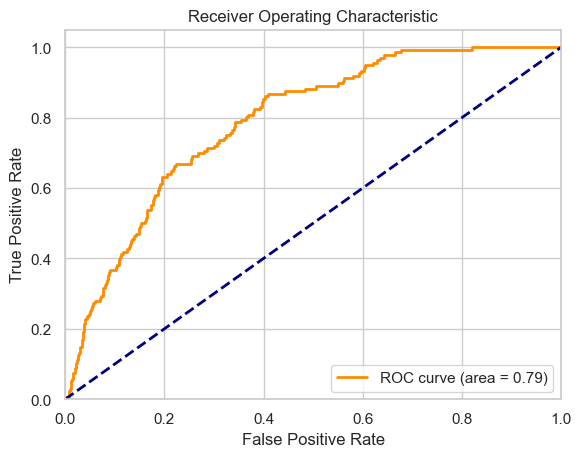

In [34]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

График, на котором **ROC-кривая модели** представлена оранжевой линией, а синяя пунктирная линия показывает ROC-кривую случайного классификатора. Чем выше и правее находится ROC-кривая относительно пунктирной линии, тем лучше производительность вашего классификатора.







# HyperOpt: библиотека для оптимизации гиперпараметров
https://hyperopt.github.io/hyperopt/

*HyperOpt* - это библиотека для Python, разработанная для оптимизации гиперпараметров алгоритмов машинного обучения. Вот несколько ключевых аспектов и особенностей HyperOpt:

### Алгоритмы оптимизации
HyperOpt поддерживает несколько алгоритмов оптимизации, включая алгоритмы, основанные на байесовской оптимизации и древовидном структурированном Парзеновском оценщике (TPE). Эти методы помогают находить оптимальные гиперпараметры более эффективно, чем традиционные методы, такие как сеточный поиск (grid search) или случайный поиск (random search).

### Поиск гиперпараметров
HyperOpt используется для автоматизации процесса поиска наилучших гиперпараметров для моделей машинного обучения. Это может включать в себя настройку таких параметров, как скорость обучения, количество слоёв в нейронной сети, количество деревьев в случайном лесу и так далее.

### Простота использования
HyperOpt довольно прост в использовании. Он предоставляет функциональный интерфейс для определения пространства поиска гиперпараметров и функции, которая оценивает производительность модели при данных гиперпараметрах.

### Интеграция с другими библиотеками
HyperOpt легко интегрируется с популярными библиотеками машинного обучения, такими как scikit-learn, TensorFlow и Keras. Это позволяет применять его в различных проектах машинного обучения без значительных изменений в существующем коде.

### Параллельное выполнение
HyperOpt поддерживает параллельное выполнение экспериментов, что позволяет значительно ускорить процесс поиска оптимальных гиперпараметров, особенно когда доступны вычислительные ресурсы, такие как несколько ядер процессора или машины.

### Гибкость
HyperOpt позволяет определять сложные пространства поиска, которые могут включать как дискретные, так и непрерывные переменные, а также зависимости между гиперпараметрами.

В коде,ниже, используется алгоритм оптимизации **TPE (Tree-structured Parzen Estimator,  Байесовская оптимизация)** из библиотеки HyperOpt для нахождения наилучших гиперпараметров для модели CatBoostClassifier.
TPE является одним из алгоритмов, поддерживаемых HyperOpt, и он используется для эффективного и байесовского поиска оптимальных гиперпараметров на основе предыдущих итераций.

### HYPEROPT ОПТИМИЗАЦИЯ
***Прогнозирование f1_average macro с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300***




In [46]:
# Определение пространства поиска гиперпараметров
space = {
    'iterations': hp.choice('iterations', [500, 750, 1000, 2000, 3000]),
    'auto_class_weights': hp.choice('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
    'depth': hp.randint('depth', 7, 13), # randint включает нижнюю границу и исключает верхнюю, поэтому 13
    'min_child_samples': hp.randint('min_child_samples', 1, 301),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 10),
    'l2_leaf_reg': hp.randint('l2_leaf_reg', 1, 6),
    'task_type': 'GPU',
    'devices': '0:1',
    'verbose': False
}

# Функция для оптимизации
def objective(params):
    model = CatBoostClassifier(**params)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    f1 = f1_score(y_test, preds, average='macro')
    return -f1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
best = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,
    trials=Trials()
)

print("Лучшие гиперпараметры:", best)

100%|██████████| 100/100 [37:50<00:00, 22.70s/trial, best loss: -0.5518165574746873] 
Лучшие гиперпараметры: {'auto_class_weights': 1, 'bagging_temperature': 8.142939381882787, 'depth': 8, 'iterations': 1, 'l2_leaf_reg': 1, 'learning_rate': 0.036157301791360084, 'min_child_samples': 278}


In [47]:
best

{'auto_class_weights': 1,
 'bagging_temperature': 8.142939381882787,
 'depth': 8,
 'iterations': 1,
 'l2_leaf_reg': 1,
 'learning_rate': 0.036157301791360084,
 'min_child_samples': 278}

100%|██████████| 100/100 [37:50<00:00, 22.70s/trial, best loss: -0.5518165574746873] 
Лучшие гиперпараметры: {'auto_class_weights': 1, 'bagging_temperature': 8.142939381882787, 'depth': 8, 'iterations': 1, 'l2_leaf_reg': 1, 'learning_rate': 0.036157301791360084, 'min_child_samples': 278}

In [21]:
# Start measuring time
start_time = time.time()

# Создание и обучение модели
hp_best_model = CatBoostClassifier(auto_class_weights ='Balanced', bagging_temperature= 8.142939381882787,depth= 8,iterations=750,
                                  l2_leaf_reg = 2,learning_rate =0.036157301791360084, min_child_samples =278,task_type='GPU',
                                   devices='0:1', verbose=False)
                                  
hp_best_model.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 7.2795717716 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.07      0.16      0.10       136

    accuracy                           0.94      6923
   macro avg       0.53      0.56      0.53      6923
weighted avg       0.96      0.94      0.95      6923

Confusion Matrix:
[[6497  290]
 [ 114   22]]


Text(67.25, 0.5, 'True labels')

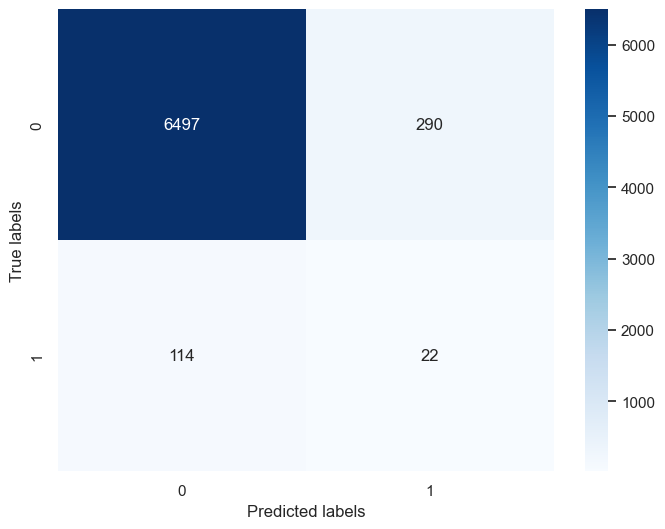

In [22]:
# Предсказание на тестовой выборке
y_pred_hp =hp_best_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_hp))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hp)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [23]:
# Получение предсказанных вероятностей для каждого класса
y_pred_proba_hp = hp_best_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pred_proba_hp_class_1 = y_pred_proba_hp[:, 1]


In [24]:
# Расчет AUC-ROC
auc_hp = roc_auc_score(y_test, y_pred_proba_hp_class_1)
print(f"AUC-ROC_hp: {auc_hp}")


AUC-ROC_hp: 0.7804301476005164


***CatBoostClassifier** learning_rate: The **default** learning rate is typically set to 0.03.

depth: The default maximum tree depth is typically set to 6.

iterations: The default number of boosting iterations is typically set to 1000.

l2_leaf_reg: The default L2 regularization term is typically set to 3.

border_count: The default number of splits for numerical features is typically set to 254.

Оптимизация по библиотеке **HyperOpt**

**algorithm = rand.suggest** 

**rand.suggest** относится к алгоритму случайного поиска.

При использовании `rand.suggest`:

- Гиперпараметры выбираются случайным образом из заданного пространства поиска (space).
- Не используется никакой истории или информации о предыдущих оценках гиперпараметров для направления выбора. Каждый выбор независим и случаен.
- Этот метод обычно менее эффективен, чем `tpe.suggest`, особенно для сложных пространств поиска или когда количество итераций ограничено, поскольку он не использует информацию о прошлых оценках для улучшения поиска.

Случайный поиск может быть полезен в следующих ситуациях:

- Когда пространство гиперпараметров невелико и его можно эффективно исследовать без сложных алгоритмов.
- В качестве базовой линии для сравнения более сложных методов оптимизации, таких как TPE.

***Прогнозирование F1 score for class 1 с iterations= [500, 750, 1000,2000,3000] и с min_child_samples между 1 и 300**

In [59]:
# Определение пространства поиска гиперпараметров
space = {
    'iterations': hp.choice('iterations', [500, 750, 1000, 2000, 3000]),
    'auto_class_weights': hp.choice('auto_class_weights', [None, 'Balanced', 'SqrtBalanced']),
    'depth': hp.randint('depth', 7, 13), # randint включает нижнюю границу и исключает верхнюю, поэтому 13
    'min_child_samples': hp.randint('min_child_samples', 1, 301),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 10),
    'l2_leaf_reg': hp.randint('l2_leaf_reg', 1, 6),
    'task_type': 'GPU',
    'devices': '0:1',
    'verbose': False
}

# Функция для оптимизации
def objective(params):
    model = CatBoostClassifier(**params)
    model.fit(X_train_over, y_train_over)
    preds = model.predict(X_test_sc)
    # Calculate the F1 score for each class
    f1_scores = f1_score(y_test, preds, average=None)

    # We're interested in the F1 score for class 1
    f1_class_1 = f1_scores[1]
    return -f1_class_1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
best_1 = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=200,
    trials=Trials()
)

print("Лучшие гиперпараметры:", best_1)

100%|██████████| 200/200 [1:05:57<00:00, 19.79s/trial, best loss: -0.14511041009463724]
Лучшие гиперпараметры: {'auto_class_weights': 2, 'bagging_temperature': 0.7310990650172309, 'depth': 7, 'iterations': 2, 'l2_leaf_reg': 3, 'learning_rate': 0.02384628272250222, 'min_child_samples': 224}


In [61]:
best_1

{'auto_class_weights': 2,
 'bagging_temperature': 0.7310990650172309,
 'depth': 7,
 'iterations': 2,
 'l2_leaf_reg': 3,
 'learning_rate': 0.02384628272250222,
 'min_child_samples': 224}

best_1 ={'auto_class_weights': 2,
 'bagging_temperature': 0.7310990650172309,
 'depth': 7,
 'iterations': 2,
 'l2_leaf_reg': 3,
 'learning_rate': 0.02384628272250222,
 'min_child_samples': 224}


In [25]:
# Start measuring time
start_time = time.time()

# Создание и обучение модели
hp_best_model_1 = CatBoostClassifier(auto_class_weights ='SqrtBalanced', bagging_temperature= 0.7310990650172309,depth= 7,iterations=1000,
                                  l2_leaf_reg = 4,learning_rate =0.02384628272250222, min_child_samples =224,task_type='GPU',
                                   devices='0:1', verbose=False)
                                  
hp_best_model_1.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 7.8752782345 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6787
           1       0.08      0.32      0.13       136

    accuracy                           0.92      6923
   macro avg       0.53      0.62      0.54      6923
weighted avg       0.97      0.92      0.94      6923

Confusion Matrix:
[[6303  484]
 [  93   43]]


Text(67.25, 0.5, 'True labels')

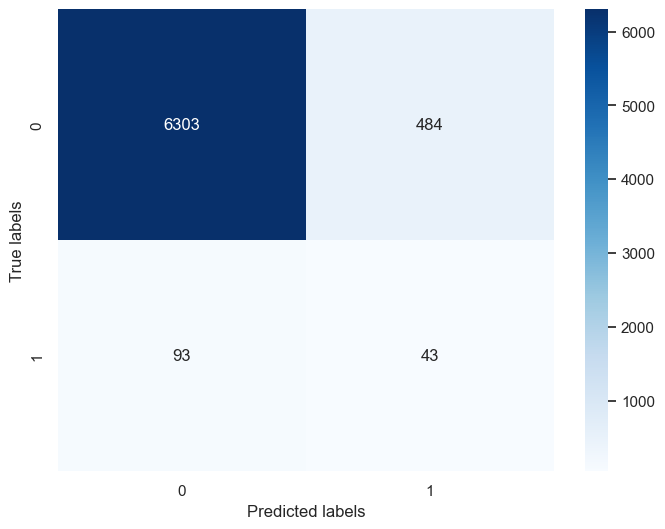

In [26]:
# Предсказание на тестовой выборке
y_pred_hp_1 =hp_best_model_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_hp_1))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_hp_1)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [27]:
# Получение предсказанных вероятностей для каждого класса
y_pr_pr_hp = hp_best_model_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pr_pr_hp_class_1 = y_pr_pr_hp[:, 1]


In [28]:
# Расчет AUC-ROC
auc_hp_1 = roc_auc_score(y_test, y_pr_pr_hp_class_1)
print(f"AUC-ROC_hp_1: {auc_hp_1}")


AUC-ROC_hp_1: 0.8019732793662625


In [29]:
# Save the model
with open('hp_best_model_1.pkl', 'wb') as file:
    pickle.dump(hp_best_model_1, file)

In [30]:
# Load the model
with open('hp_best_model_1.pkl', 'rb') as file:
  hp_best_model_1 = pickle.load(file)

## Прогнозирование и оптимизация параметров XGBClassifier()
https://xgboost.readthedocs.io/en/stable/tutorials/index.html


https://xgboost.readthedocs.io/en/stable/parameter.html

### Описание Гиперпараметров XGBClassifier

#### `n_estimators`
- Определяет количество построенных деревьев решений в процессе градиентного бустинга.
- Большее количество деревьев может улучшить производительность модели за счет повышения точности, но также увеличивает риск переобучения и время обучения.

#### `learning_rate`
- Также известный как скорость обучения, этот параметр контролирует величину обновления весов модели на каждом шаге градиентного спуска.
- Меньшие значения увеличивают точность, но замедляют обучение. Большие значения ускоряют обучение, но могут пропустить оптимальные решения.

#### `max_depth`
- Максимальная глубина каждого дерева. Большая глубина позволяет модели захватывать более сложные шаблоны, но увеличивает риск переобучения.

#### `min_child_weight`
- Определяет минимальное взвешенное количество обучающих примеров в каждом листе дерева.
- Большие значения делают модель более консервативной и помогают предотвратить переобучение.

#### `gamma`
- Параметр регуляризации, который управляет общей сложностью модели.
- Большие значения gamma ограничивают создание новых разделений, помогая предотвратить переобучение.

#### `subsample`
- Определяет долю выборки, используемую для обучения каждого дерева. 
  
Этот параметр контролирует долю выборки, используемой для обучения каждого дерева. Значения меньше 1.0 ведут к уменьшению риска переобучени        я (overfitting), так как каждое дерево обучается на случайной подвыборке данных. Для несбалансированных наборов данных это может помочь уменьшит   ь переобучение на преобладающий клас

#### 'colsample_bytree'
-(Доля признаков для обучения каждого дерева):

Этот параметр определяет долю признаков, используемых для обучения каждого дерева. Использование части признаков (меньше 1.0) также помогает в борьбе с переобучением. В случаях, когда некоторые признаки могут иметь сильное влияние на целевую переменную, случайный выбор подмножества признаков для каждого дерева может привести к более устойчивым и обобщающим моделям.с.

### Параметры по умолчанию  xgb_model

Fit Time: 0.1512353420 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      6787
           1       0.08      0.28      0.12       136

    accuracy                           0.92      6923
   macro avg       0.53      0.61      0.54      6923
weighted avg       0.97      0.92      0.94      6923

Confusion Matrix:
[[6341  446]
 [  98   38]]


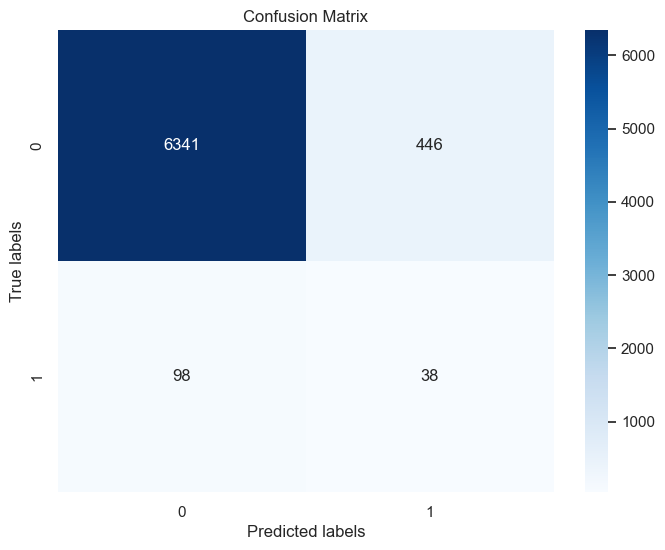

In [31]:
# Start measuring time
start_time = time.time()

# Обучение модели ансамбля 
xgb_model = XGBClassifier().fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


# Предсказание на тестовой выборке
y_pred = xgb_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Получение предсказанных вероятностей для каждого класса
y_pr_pr_xgb = xgb_model.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_pr_pr_xgb_class_1 = y_pr_pr_xgb[:, 1]

In [33]:
# Расчет AUC-ROC
auc_xgb = roc_auc_score(y_test, y_pr_pr_xgb_class_1)
print(f"AUC-ROC_XGB: {auc_xgb}")


AUC-ROC_XGB: 0.7843010859861846


***Построение графика по визуализации важности признаков в модели  xgb_model***

In [131]:
# Предполагая, что X_train_over - это массив NumPy
X_train_over_df = pd.DataFrame(X_train_over)
# Копирование названий столбцов из X_train в X_train_over_df
X_train_over_df.columns = X_train.columns

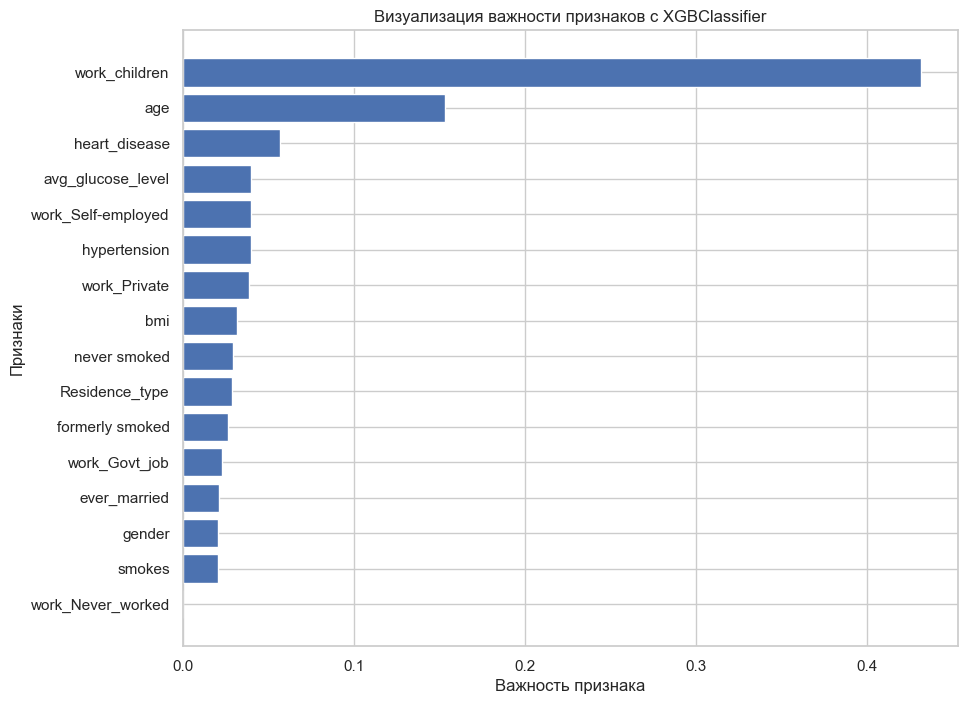

In [132]:
# Получение важности признаков
feature_importances = xgb_model.feature_importances_
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx = feature_importances.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X_train_over_df.columns[i] for i in sorted_idx])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

**Графическое изображение деревьев XGBClassifier**

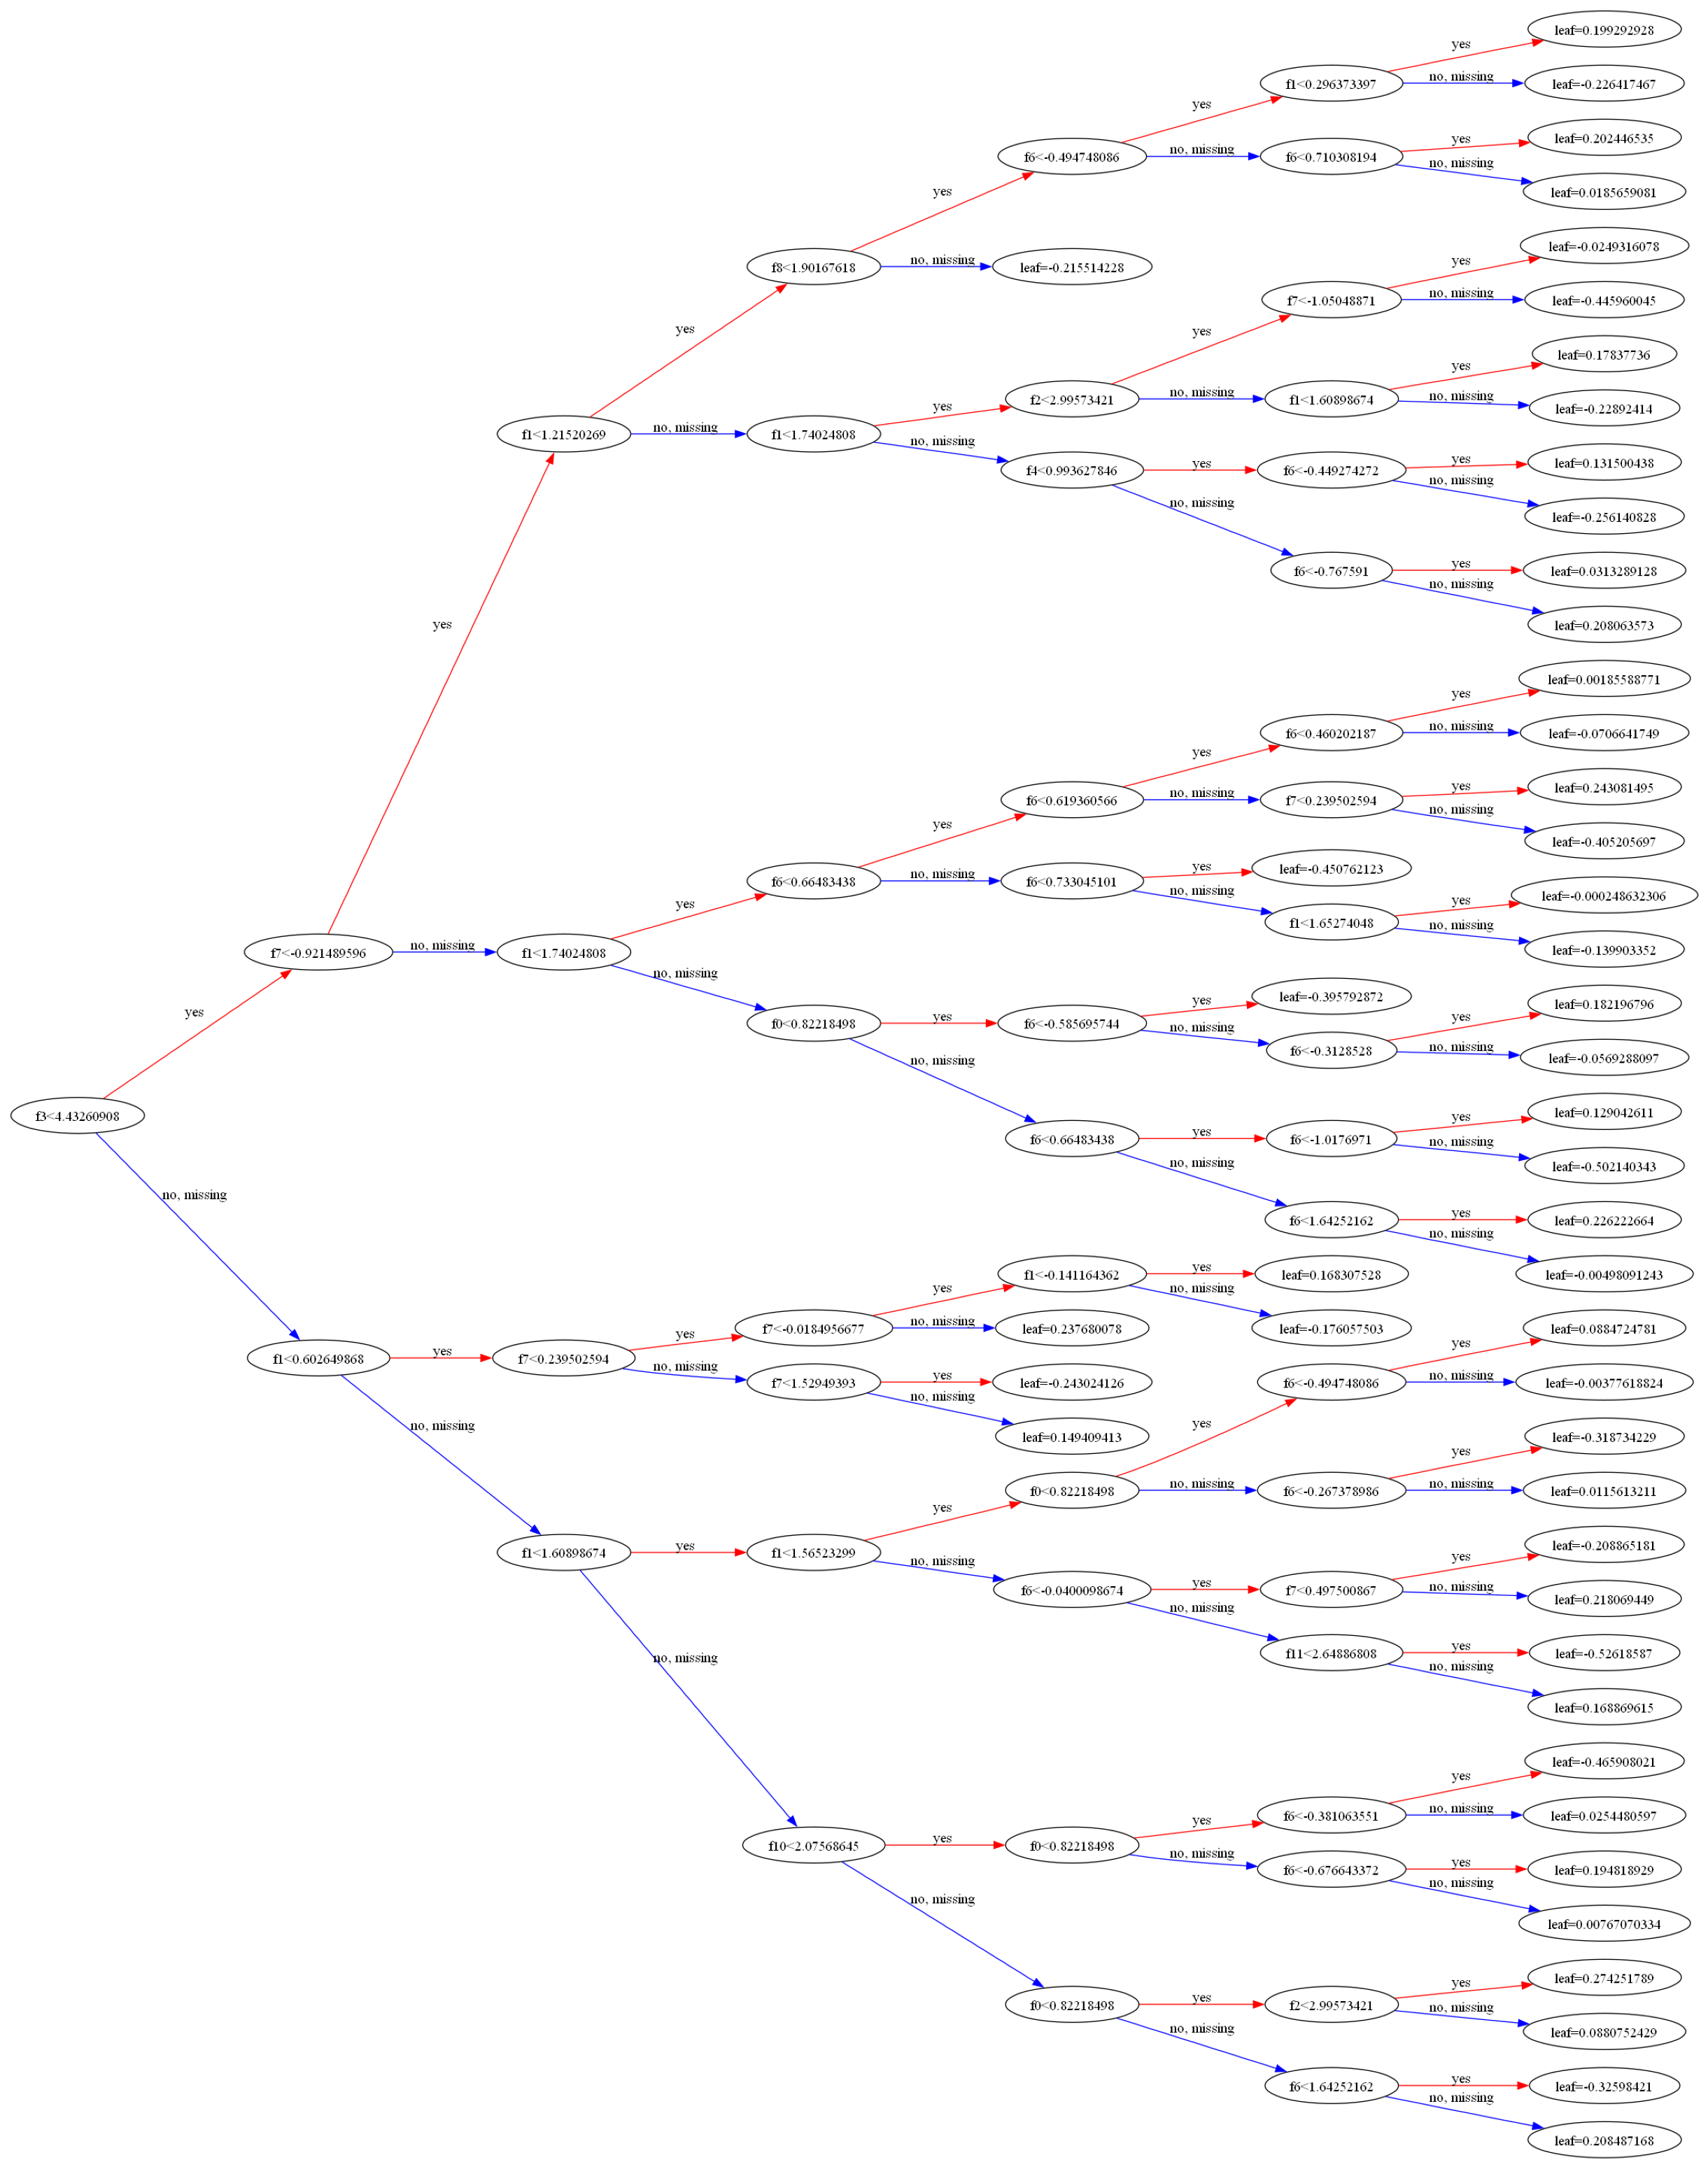

In [76]:
#plot_tree(xgb_model), The default in the
#XGBoost library is 100
fig, ax = plt.subplots(figsize=(40, 40)) 
#Значение по умолчанию num_trees=0 означает, что будет отображено первое (нулевое) дерево из ансамбля. 
plot_tree(xgb_model, num_trees=99, rankdir='LR', ax=ax)

plt.show()


### Оптимизация параметров XGBClassifier по библиотеке Hyperopt алгоритм  "Tree-structured Parzen Estimator" или TPE,(Байесовской оптимизации).
тек:

В библиотеке Hyperopt, `hp.quniform`, `hp.loguniform` и `hp.uniform` - это различные типы гиперпараметров, которые можно определить в пространстве поиска для оптимизации. Вот что они означают:

- `hp.quniform` - Равномерное распределение с квантованием (дискретными значениями).
   - Пример: `hp.quniform('n_estimators', 50, 300, 10)` создает гиперпараметр с именем 'n_estimators', который будет равномерно выбирать значения от 50 до 300 с шагом 10. То есть, он будет искать целые числа между 50 и 300, такие как 50, 60, 70 и так далее.

- `hp.loguniform` - Логарифмическое равномерное распределение.
   - Пример: `hp.loguniform('learning_rate', -3, 0)` создает гиперпараметр с именем 'learning_rate', который будет выбирать значения в логарифмической шкале от 0.001 до 1.0. Это полезно, когда вы хотите исследовать широкий диапазон значений с разной степенью масштабирования.

- `hp.uniform` - Равномерное распределение без квантования (континуальные значения).
   - Пример: `hp.uniform('subsample', 0.6, 1.0)` создает гиперпараметр с именем 'subsample', который будет выбирать значения между 0.6 и 1.0. Это подходит для гиперпараметров, которые могут принимать любое значение в заданном диапазоне.

Эти различные типы гиперпараметров позволяют вам гибко определять, какие значения могут быть выбраны в процессе оптимизации. Выбор конкретного типа гиперпараметра зависит от того, какие значения вы хотите исследовать и какую природу имеют эти значения в вашей модели.



### Описание Компонентов Hyperopt

#### `trials = Trials()`
- **Trials()** - это класс из библиотеки Hyperopt, используемый для хранения информации о всех попытках оптимизации.
- Каждый вызов функции **objective** с новым набором гиперпараметров и результаты этого вызова (включая значения параметров и значение функции потерь) сохраняются в объекте **trials**.
- Это позволяет анализировать все испытания после завершения процесса оптимизации, включая анализ наиболее и наименее успешных гиперпараметров и распределение функции потерь.

#### `fn=objective`
- **fn** - аргумент функции **fmin** из Hyperopt, определяющий функцию для минимизации.
- **objective** - пользовательская функция, принимающая набор гиперпараметров (определенных в **space**) и возвращающая значение, которое Hyperopt пытается минимизировать. Обычно это значение функции потерь модели машинного обучения.
- В контексте **objective**, обычно строится и обучается модель (например, **XGBClassifier** с данными гиперпараметрами), а затем возвращается метрика для минимизации (например, отрицательная F1-мера для максимизации F1-меры).

Таким образом, **trials** записывает историю всех попыток оптимизации, а **fn=objective** определяет, что именно нужно оптимизировать.

В контексте использования функции **fmin** из библиотеки **Hyperopt,** best loss отражает лучшее (то есть наименьшее) значение функции потерь, 
достигнутое во время процесса оптимизации. 
В нашем случае, поскольку мы оптимизируете гиперпараметры классификатора XGBoost для максимизации метрики F1, функция потерь определена как отрицательное значение этой метрики F1 (то есть loss = -score).

Таким образом, целью является минимизация loss, что эквивалентно максимизации метрики F1. В идеальном случае, best loss должен стремиться к нулю, что означает максимально возможное значение F1 (так как F1 метрика имеет максимальное значение 1, и loss это её отрицание).

Если **best loss близок к 0**, это указывает на высокую производительность классификатора с оптимизированными гиперпараметрами.

Если **best loss значительно отличается от 0 (например, -0.5 или выше), это может указывать на то, что классификатор может быть улучшен, либо что задача является особенно сложной и требует дальнейшего исследования или изменения подхода к обучению.






### HYPEROPT ОПТИМИЗАЦИЯ

**Прогнозирование** ***f1_class_1***

In [ ]:
# Определение пространства параметров
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),  # Количество деревьев
    'learning_rate': hp.loguniform('learning_rate', -3, 0),# Скорость обучения (learning rate)
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]), # Максимальная глубина деревьев
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),# Минимальное количество объектов в листе дерева
    'gamma': hp.loguniform('gamma', -3, 2),# Параметр регуляризации gamma
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Доля объектов для обучения каждого дерева
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),  # Доля признаков для обучения каждого дерева
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1) # Максимальное изменение весовых коэффициентов при обучении
}


    # Функция оптимизации
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'learning_rate': params['learning_rate'],
        'max_depth': int(params['max_depth']),
        'min_child_weight': int(params['min_child_weight']),
        'gamma': params['gamma'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'max_delta_step': int(params['max_delta_step'])
    }
    clf = xgb.XGBClassifier(**params)
    
    clf.fit(X_train_over, y_train_over)
    preds = clf.predict(X_test_sc)
    # Calculate the F1 score for each class
    f1_scores = f1_score(y_test, preds, average=None)

    # We're interested in the F1 score for class 1
    f1_class_1 = f1_scores[1]
    return -f1_class_1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=1000,
            trials=trials)

print("Лучшие найденные гиперпараметры:")
print(best)

best = {'colsample_bytree': 0.6518323245271733, 'gamma': 0.0692966577333013, 'learning_rate': 0.08850344163899666, 'max_delta_step': 1.0, 'max_depth': 7, 'min_child_weight': 7.0, 'n_estimators': 80.0, 'subsample': 0.6454609159163801}

In [21]:
# Лучшие найденные гиперпараметры
best_params = {
    'colsample_bytree': 0.6518323245271733, 
    'gamma': 0.0692966577333013, 
    'learning_rate': 0.08850344163899666, 
    'max_delta_step': 1.0, 
    'max_depth': 7, 
    'min_child_weight': 7.0, 
    'n_estimators': 80.0, 
    'subsample': 0.6454609159163801
}

# Преобразование некоторых параметров к целым числам
best_params['n_estimators'] = int(best_params['n_estimators'])
best_params['max_depth'] = int(best_params['max_depth'])
best_params['min_child_weight'] = int(best_params['min_child_weight'])
best_params['max_delta_step'] = int(best_params['max_delta_step'])
start_time = time.time()
# Создание и обучение модели
xgb = XGBClassifier(**best_params)                                  
xgb.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 0.1609981060 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6787
           1       0.07      0.64      0.13       136

    accuracy                           0.83      6923
   macro avg       0.53      0.74      0.52      6923
weighted avg       0.97      0.83      0.89      6923

Confusion Matrix:
[[5680 1107]
 [  49   87]]


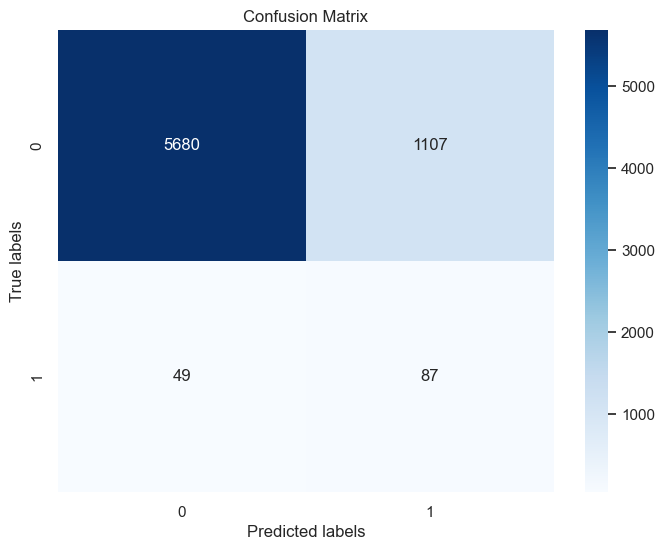

In [22]:

# Предсказание на тестовой выборке
y_pred = xgb.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# Получение предсказанных вероятностей для каждого класса
y_xgb = xgb.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_xgb_class_1 = y_xgb[:, 1]

In [83]:
# Расчет AUC-ROC
auc_xgb_1 = roc_auc_score(y_test,y_xgb_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_1}")


AUC-ROC_XGB_1: 0.8293889052600559


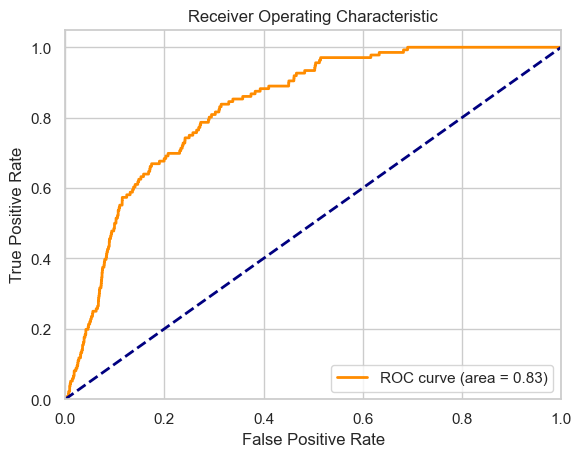

In [98]:
fpr, tpr, thresholds = roc_curve(y_test, y_xgb_class_1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

***Сохранение модели***

In [133]:
# Save the model
with open('xgb.pkl', 'wb') as file:
    pickle.dump(xgb, file)


***Загрузка, сохраненной модели***

In [134]:
# Load the model
with open('xgb.pkl', 'rb') as file:
    loaded_xgb= pickle.load(file)

***Визуализация важности признаков для модели xgb***

In [135]:
# Получение важности признаков
feature_importances_1 = xgb.feature_importances_
feature_importances_1

array([0.02067665, 0.15324314, 0.03980715, 0.05675407, 0.02118817,
       0.02861175, 0.03999857, 0.03138596, 0.02618602, 0.0291815 ,
       0.02056656, 0.02290376, 0.        , 0.03829321, 0.03982465,
       0.43137887], dtype=float32)

In [136]:
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx_1 = feature_importances_1.argsort()
sorted_idx_1

array([12, 10,  0,  4, 11,  8,  5,  9,  7, 13,  2, 14,  6,  3,  1, 15],
      dtype=int64)

In [137]:
# Предполагая, что X_train_over - это массив NumPy
X_train_over_df = pd.DataFrame(X_train_over)
# Копирование названий столбцов из X_train в X_train_over_df
X_train_over_df.columns = X_train.columns


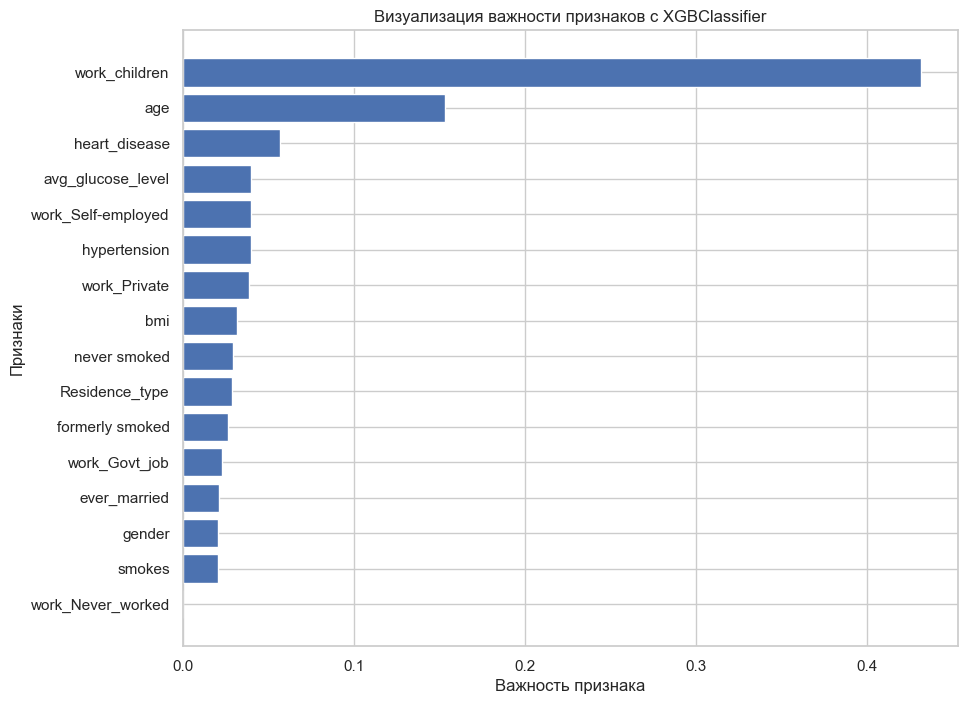

In [140]:
# Получение важности признаков
feature_importances_1 = xgb.feature_importances_
# Для лучшей визуализации, можно отсортировать признаки по важности
sorted_idx_1 = feature_importances_1.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx_1)), feature_importances_1[sorted_idx_1], align='center')
plt.yticks(range(len(sorted_idx_1)), [X_train_over_df.columns[i] for i in sorted_idx_1])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

### HYPEROPT ОПТИМИЗАЦИЯ

***Прогнозирование f1 = f1_score average='macro'***

In [85]:
# Определение пространства параметров
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 10),  # Количество деревьев
    'learning_rate': hp.loguniform('learning_rate', -3, 0),# Скорость обучения (learning rate)
    'max_depth': hp.choice('max_depth', [3, 4, 5, 6, 7, 8, 9, 10]), # Максимальная глубина деревьев
    'min_child_weight': hp.quniform('min_child_weight', 1,10 , 1),# Минимальное количество объектов в листе дерева
    
    'gamma': hp.loguniform('gamma', -3, 2),# Параметр регуляризации gamma
    'subsample': hp.uniform('subsample', 0.6, 1.0),  # Доля объектов для обучения каждого дерева
    'colsample_bytree': hp.uniform('colsample_bytree', 0.6, 1.0),  # Доля признаков для обучения каждого дерева
    'max_delta_step': hp.quniform('max_delta_step', 0, 10, 1) # Максимальное изменение весовых коэффициентов при обучении
}


    # Функция оптимизации
def objective(params):
   
   
    clf = XGBClassifier(  # Использование класса XGBClassifier непосредственно
        n_estimators=int(params['n_estimators']),
        learning_rate=params['learning_rate'],
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        max_delta_step=int(params['max_delta_step'])
    )
    
    clf.fit(X_train_over, y_train_over)
    preds = clf.predict(X_test_sc)
    f1 = f1_score(y_test, preds, average='macro')
    return -f1 # Hyperopt всегда минимизирует функцию, поэтому берем отрицательное значение F1

# Запуск процесса оптимизации
trials = Trials()
best_1 = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=3000,
            trials=trials)

print("Лучшие найденные гиперпараметры:")
print(best_1)

100%|██████████| 3000/3000 [23:25<00:00,  2.13trial/s, best loss: -0.5587713741409256]
Лучшие найденные гиперпараметры:
{'colsample_bytree': 0.8058114279847318, 'gamma': 0.3277314983244731, 'learning_rate': 0.1471911100382243, 'max_delta_step': 7.0, 'max_depth': 5, 'min_child_weight': 6.0, 'n_estimators': 150.0, 'subsample': 0.8078399937475829}


In [86]:
best_1

{'colsample_bytree': 0.8058114279847318,
 'gamma': 0.3277314983244731,
 'learning_rate': 0.1471911100382243,
 'max_delta_step': 7.0,
 'max_depth': 5,
 'min_child_weight': 6.0,
 'n_estimators': 150.0,
 'subsample': 0.8078399937475829}

In [23]:
# Лучшие найденные гиперпараметры
best_params_1 ={'colsample_bytree': 0.8058114279847318,
 'gamma': 0.3277314983244731,
 'learning_rate': 0.1471911100382243,
 'max_delta_step': 7.0,
 'max_depth': 5,
 'min_child_weight': 6.0,
 'n_estimators': 150.0,
 'subsample': 0.8078399937475829}

# Преобразование некоторых параметров к целым числам
best_params_1['n_estimators'] = int(best_params_1['n_estimators'])
best_params_1['max_depth'] = int(best_params_1['max_depth'])
best_params_1['min_child_weight'] = int(best_params_1['min_child_weight'])
best_params_1['max_delta_step'] = int(best_params_1['max_delta_step'])
# Start measuring time
start_time = time.time()
# Создание и обучение модели
xgb_1 = XGBClassifier(**best_params_1)   
xgb_1.fit(X_train_over, y_train_over)
# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")


Fit Time: 0.2319912910 seconds


In [125]:
# Получение важности признаков
feature_importances_2 = xgb_1.feature_importances_
feature_importances_2

array([0.03638291, 0.16702613, 0.04832383, 0.05997381, 0.03777483,
       0.02888615, 0.04597984, 0.04204901, 0.03029708, 0.04272627,
       0.0324064 , 0.03804245, 0.        , 0.03921523, 0.03904925,
       0.31186685], dtype=float32)

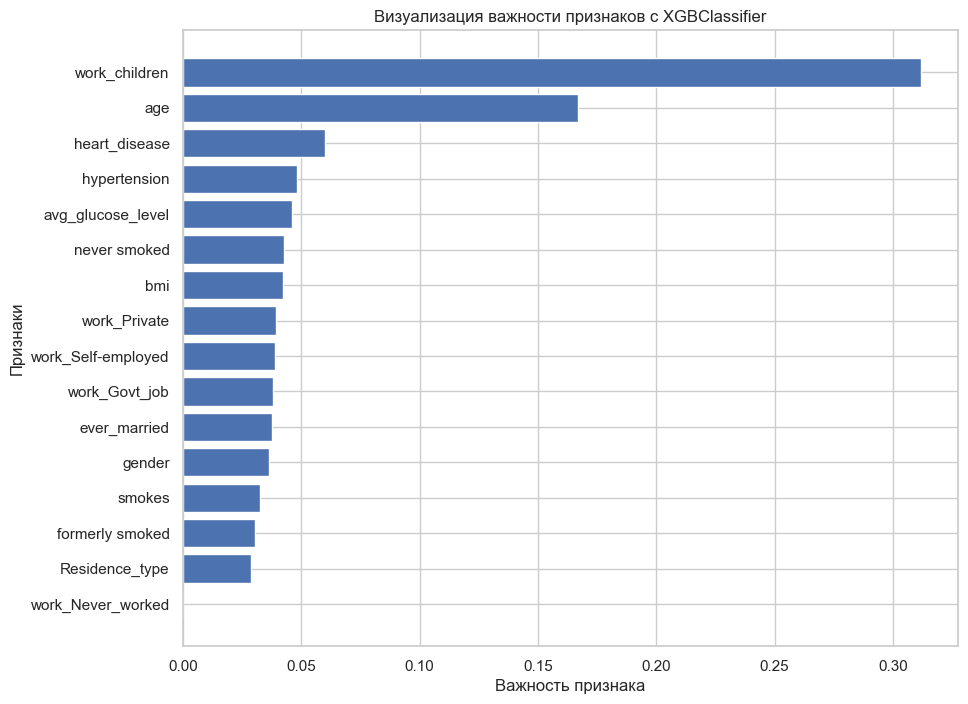

In [139]:

sorted_idx_2 = feature_importances_2.argsort()

# Создание графика
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx_2)), feature_importances_2[sorted_idx_2], align='center')
plt.yticks(range(len(sorted_idx_2)), [X_train_over_df.columns[i] for i in sorted_idx_2])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Визуализация важности признаков с XGBClassifier')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      6787
           1       0.06      0.47      0.11       136

    accuracy                           0.86      6923
   macro avg       0.53      0.67      0.52      6923
weighted avg       0.97      0.86      0.91      6923

Confusion Matrix:
[[5864  923]
 [  72   64]]


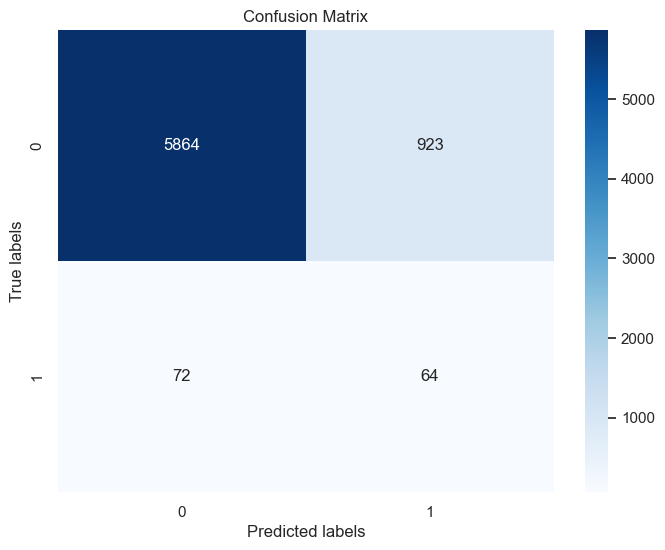

In [93]:

# Предсказание на тестовой выборке
y_pred_1 = xgb_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred_1))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [94]:
# Получение предсказанных вероятностей для каждого класса
y_xgb_1 = xgb_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
y_xgb_1_class_1 = y_xgb_1[:, 1]

In [95]:
# Расчет AUC-ROC
auc_xgb_2 = roc_auc_score(y_test,y_xgb_1_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_2}")


AUC-ROC_XGB_1: 0.8067932639388449


## Оптимизация гиперпараметров OPTUNA

***Прогнозирование f1 = f1_score average='macro'***

In [143]:
def objective(trial):
    # Определение параметров
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 100.0)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    max_delta_step = trial.suggest_int('max_delta_step', 0, 10)

    # Создание модели
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_delta_step=max_delta_step
    )

    # Обучение модели
    model.fit(X_train_over, y_train_over)

    # Предсказания
    preds = model.predict(X_test_sc)

    # Расчет F1-меры
    f1 = f1_score(y_test, preds, average='macro')
    
    return f1

# Создание исследования
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)
# After the optimization is complete
best_trial = study.best_trial

print(f"Best trial: {best_trial.number}")
print(f"  Value: {best_trial.value}")

print("  Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")

# Добавление параметра для GPU
best_params['tree_method'] = 'gpu_hist'

# After the optimize function completes, you can get the best set of hyperparameters
best_params = study.best_trial.params

# Create the best model
best_model_xgb = XGBClassifier(**best_params, verbosity=0)
best_model_xgb.fit(X_train_over, y_train_over)

# You can now evaluate the best_model on your test set, save it, or do anything else you need macro avg    

# Вывод результатов
print("Лучшие найденные гиперпараметры:")
print("\nBest trial parameters: ", study.best_params)
print("Best trial F1 macro score: ", study.best_value)


[I 2024-01-09 14:29:00,995] A new study created in memory with name: no-name-5882f60b-5248-45c4-a30d-e44e1c546c32
[I 2024-01-09 14:29:01,680] Trial 0 finished with value: 0.513943229064231 and parameters: {'n_estimators': 300, 'learning_rate': 0.002226269381962157, 'max_depth': 8, 'min_child_weight': 3, 'gamma': 0.1198118085512006, 'subsample': 0.7095334686913596, 'colsample_bytree': 0.6426224996737894, 'max_delta_step': 7}. Best is trial 0 with value: 0.513943229064231.
[I 2024-01-09 14:29:01,817] Trial 1 finished with value: 0.48715534695082596 and parameters: {'n_estimators': 78, 'learning_rate': 0.0032020905728893955, 'max_depth': 5, 'min_child_weight': 2, 'gamma': 0.002024266789186287, 'subsample': 0.6032450777635018, 'colsample_bytree': 0.656730989475036, 'max_delta_step': 1}. Best is trial 0 with value: 0.513943229064231.
[I 2024-01-09 14:29:02,352] Trial 2 finished with value: 0.5293482349454584 and parameters: {'n_estimators': 239, 'learning_rate': 0.012906061304917628, 'max_d

Best trial: 237
  Value: 0.5568281909768843
  Params: 
    n_estimators: 228
    learning_rate: 0.06824655441824423
    max_depth: 10
    min_child_weight: 3
    gamma: 0.0010128333269816376
    subsample: 0.9996908246037367
    colsample_bytree: 0.7352246360137676
    max_delta_step: 1
Лучшие найденные гиперпараметры:

Best trial parameters:  {'n_estimators': 228, 'learning_rate': 0.06824655441824423, 'max_depth': 10, 'min_child_weight': 3, 'gamma': 0.0010128333269816376, 'subsample': 0.9996908246037367, 'colsample_bytree': 0.7352246360137676, 'max_delta_step': 1}
Best trial F1 macro score:  0.5568281909768843


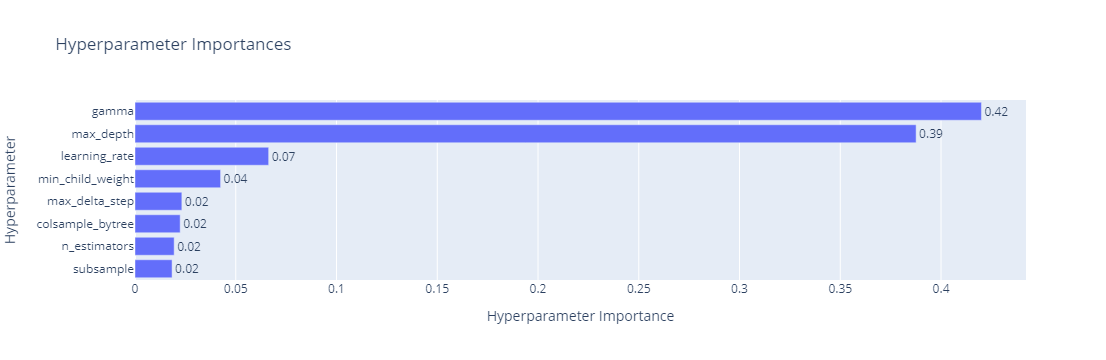

In [144]:
fig_1 = optuna.visualization.plot_param_importances(study)
fig_1.show()

In [24]:
# Define the best parameters
best_params = {
    'n_estimators': 228, 
    'learning_rate': 0.06824655441824423, 
    'max_depth': 10, 
    'min_child_weight': 3, 
    'gamma': 0.0010128333269816376, 
    'subsample': 0.9996908246037367, 
    'colsample_bytree': 0.7352246360137676, 
    'max_delta_step': 1
}

# Start measuring time
start_time = time.time()

# Create the best model and fit it
best_model_xgb = XGBClassifier(**best_params, verbosity=0)
best_model_xgb.fit(X_train_over, y_train_over)

# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 0.4639909267 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      6787
           1       0.10      0.24      0.14       136

    accuracy                           0.94      6923
   macro avg       0.54      0.60      0.56      6923
weighted avg       0.97      0.94      0.95      6923

Confusion Matrix:
[[6495  292]
 [ 103   33]]


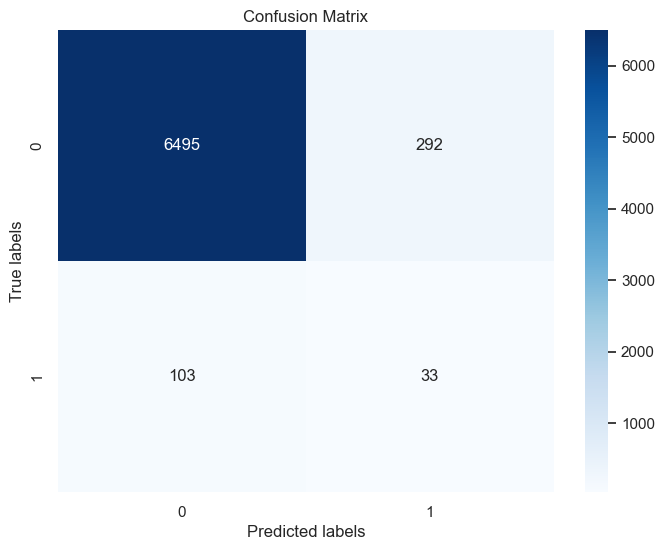

In [25]:
# Предсказание на тестовой выборке
pred = best_model_xgb.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, pred))

# Confusion matrix
print("Confusion Matrix:")

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [146]:
# Получение предсказанных вероятностей для каждого класса
pred_xgb = best_model_xgb.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
pred_xgb_class_1 = pred_xgb[:, 1]

In [147]:
# Расчет AUC-ROC
auc_xgb_pred = roc_auc_score(y_test,pred_xgb_class_1)
print(f"AUC-ROC_XGB_1: {auc_xgb_pred}")


AUC-ROC_XGB_1: 0.808603602041966


***Прогнозирование f1_class_1***

In [148]:
def objective(trial):
    # Определение параметров
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1.0)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 1e-3, 100.0)
    subsample = trial.suggest_uniform('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.6, 1.0)
    max_delta_step = trial.suggest_int('max_delta_step', 0, 10)

    # Создание модели
    model = XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        max_delta_step=max_delta_step
    )

    # Обучение модели
    model.fit(X_train_over, y_train_over)

    # Предсказания
    preds = model.predict(X_test_sc)

     
    # Calculate the F1 score for each class
    f1_scores = f1_score(y_test, preds, average=None)

    # We're interested in the F1 score for class 1
    f1_class_1 = f1_scores[1]

    return f1_class_1

# Создание исследования
study_1 = optuna.create_study(direction='maximize')
study_1.optimize(objective, n_trials=1000)
# After the optimization is complete
best_trial_1 = study_1.best_trial

print(f"Best trial: {best_trial_1.number}")
print(f"  Value: {best_trial_1.value}")

print(" Params: ")
for key, value in best_trial.params.items():
    print(f"    {key}: {value}")


# After the optimize function completes, you can get the best set of hyperparameters
best_params_1 = study_1.best_trial.params
# Добавление параметра для GPU
best_params_1['tree_method'] = 'gpu_hist'

# Create the best model
best_model_xgb_1 = XGBClassifier(**best_params_1, verbosity=0)
best_model_xgb_1.fit(X_train_over, y_train_over)

# You can now evaluate the best_model on your test set, save it, or do anything else you need macro avg    

# Вывод результатов
print("Лучшие найденные гиперпараметры:")
print("\nBest trial parameters: ", study_1.best_params)
print("Best trial f1_class_1 score: ", study_1.best_value)

[I 2024-01-09 14:44:42,194] A new study created in memory with name: no-name-aed4c07b-9648-418a-a89f-374109a6842e
[I 2024-01-09 14:44:42,346] Trial 0 finished with value: 0.12007504690431521 and parameters: {'n_estimators': 64, 'learning_rate': 0.044441694622980144, 'max_depth': 6, 'min_child_weight': 8, 'gamma': 0.06546130517710937, 'subsample': 0.8248873666805823, 'colsample_bytree': 0.7637728629487697, 'max_delta_step': 10}. Best is trial 0 with value: 0.12007504690431521.
[I 2024-01-09 14:44:42,498] Trial 1 finished with value: 0.12286689419795223 and parameters: {'n_estimators': 60, 'learning_rate': 0.05348292676727977, 'max_depth': 7, 'min_child_weight': 1, 'gamma': 0.04433842949455067, 'subsample': 0.6028898410048982, 'colsample_bytree': 0.95207678892862, 'max_delta_step': 6}. Best is trial 1 with value: 0.12286689419795223.
[I 2024-01-09 14:44:42,656] Trial 2 finished with value: 0.10725552050473186 and parameters: {'n_estimators': 131, 'learning_rate': 0.5330014272729805, 'max

Best trial: 357
  Value: 0.16401468788249696
 Params: 
    n_estimators: 228
    learning_rate: 0.06824655441824423
    max_depth: 10
    min_child_weight: 3
    gamma: 0.0010128333269816376
    subsample: 0.9996908246037367
    colsample_bytree: 0.7352246360137676
    max_delta_step: 1
Лучшие найденные гиперпараметры:

Best trial parameters:  {'n_estimators': 98, 'learning_rate': 0.025579129744263757, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.0030969732823649164, 'subsample': 0.8181836122930273, 'colsample_bytree': 0.7626548765834539, 'max_delta_step': 4}
Best trial f1_class_1 score:  0.16401468788249696


***Best trial parameters***:  {'n_estimators': 98, 'learning_rate': 0.025579129744263757, 'max_depth': 10, 'min_child_weight': 6, 'gamma': 0.0030969732823649164, 'subsample': 0.8181836122930273, 'colsample_bytree': 0.7626548765834539, 'max_delta_step': 4}
Best trial f1_class_1 score:  0.16401468788249696

In [26]:
# Define the best parameters
best_params = {
    'n_estimators': 98,
    'learning_rate': 0.025579129744263757,
    'max_depth': 10,
    'min_child_weight': 6,
    'gamma': 0.0030969732823649164,
    'subsample': 0.8181836122930273,
    'colsample_bytree': 0.7626548765834539,
    'max_delta_step': 4
}

# Start measuring time
start_time = time.time()

# Create the best model and fit it
best_model_xgb_1 = XGBClassifier(**best_params, verbosity=0)
best_model_xgb_1.fit(X_train_over, y_train_over)

# Calculate the fit time
fit_time = time.time() - start_time
print(f"Fit Time: {fit_time:.10f} seconds")

Fit Time: 0.3119974136 seconds


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      6787
           1       0.10      0.49      0.16       136

    accuracy                           0.90      6923
   macro avg       0.54      0.70      0.56      6923
weighted avg       0.97      0.90      0.93      6923

Confusion Matrix:
[[6173  614]
 [  69   67]]


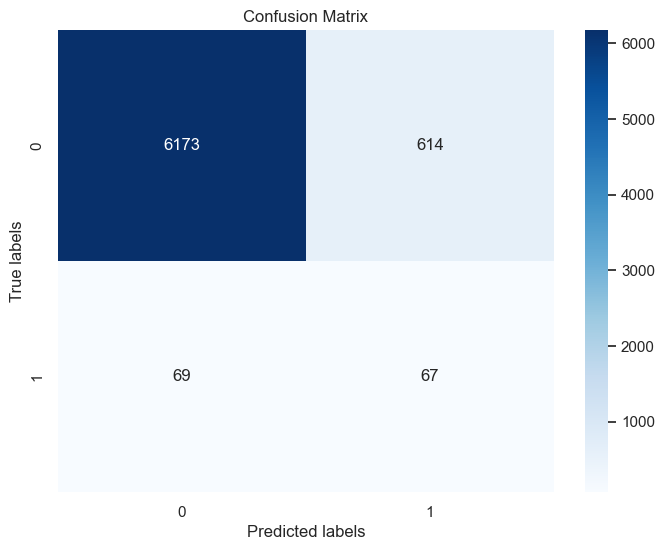

In [27]:
# Предсказание на тестовой выборке
pred_1 = best_model_xgb_1.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, pred_1))

# Confusion matrix
print("Confusion Matrix:")

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, pred_1)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [28]:
# Получение предсказанных вероятностей для каждого класса
pred_xgb_1 = best_model_xgb_1.predict_proba(X_test_sc)

# Предсказанные вероятности для класса 1
# Обычно класс 1 соответствует второму столбцу возвращаемого массива
pred_xgb_1_class_1 = pred_xgb_1[:, 1]

In [29]:
# Расчет AUC-ROC
auc_xgb_1_pred = roc_auc_score(y_test,pred_xgb_1_class_1)
print(f"AUC-ROC_XGB_1_1: {auc_xgb_1_pred}")


AUC-ROC_XGB_1_1: 0.8111148909246917


# 2.Bagging

## Кросс Валидация



In [155]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_over,
        y=y_train_over,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

fit_time  score_time  accuracy  precision    recall  \
RandomForestClassifier   23.959801    0.976399  0.996395   0.996422  0.996395   
SVC                     363.362501   78.057773  0.837073   0.842447  0.837073   
DecisionTreeClassifier    0.993403    0.018899  0.997039   0.997057  0.997039   
KNeighborsClassifier      0.119800   19.999299  0.971218   0.972793  0.971218   

                              f1  
RandomForestClassifier  0.996395  
SVC                     0.836432  
DecisionTreeClassifier  0.997039  
KNeighborsClassifier    0.971194

### Прогнозирование с DecisionTreeClassifier() параметры по умолчанию

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6787
           1       0.03      0.03      0.03       136

    accuracy                           0.96      6923
   macro avg       0.51      0.51      0.51      6923
weighted avg       0.96      0.96      0.96      6923

Confusion Matrix:
[[6673  114]
 [ 132    4]]


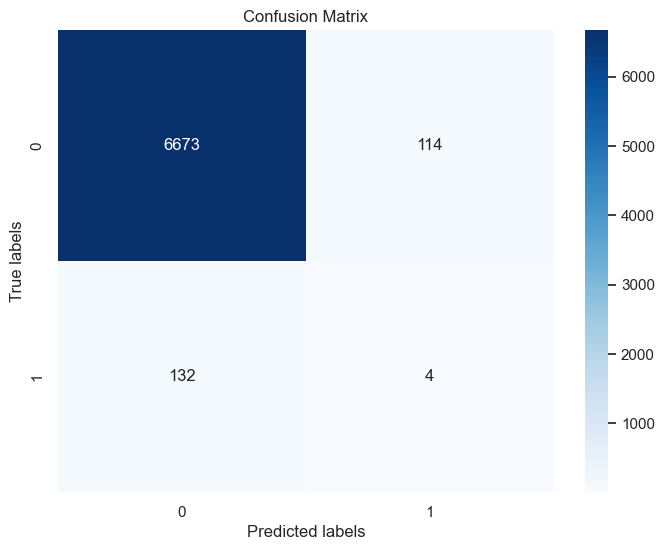

In [156]:
# Обучение модели ансамбля
tree_model = DecisionTreeClassifier().fit(X_train_over, y_train_over)

# Предсказание на тестовой выборке
y_pred = tree_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Прогнозирование с RandomForestClassifier() параметры по умолчанию

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6787
           1       0.05      0.01      0.01       136

    accuracy                           0.98      6923
   macro avg       0.51      0.50      0.50      6923
weighted avg       0.96      0.98      0.97      6923

Confusion Matrix:
[[6767   20]
 [ 135    1]]


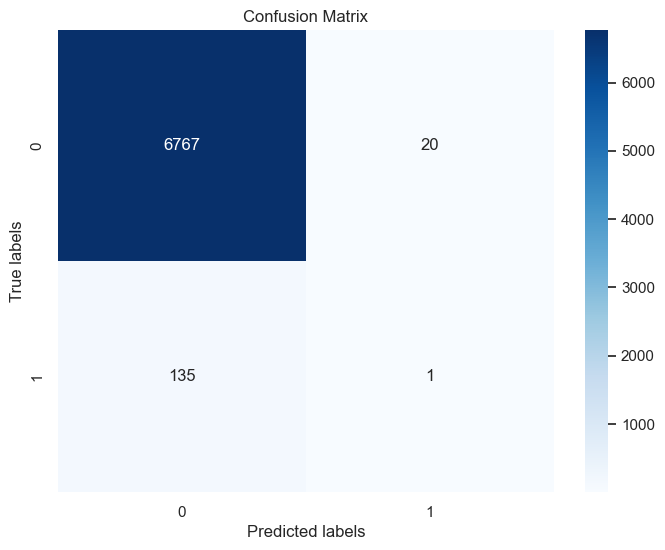

In [158]:
# Обучение модели ансамбля
forest_model = RandomForestClassifier().fit(X_train_over, y_train_over)

# Предсказание на тестовой выборке
y_pred = forest_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# 3. STACKING СТЕКИНГ

## STACKING СТЕКИНГ 1

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6787
           1       0.05      0.01      0.02       136

    accuracy                           0.97      6923
   macro avg       0.51      0.50      0.50      6923
weighted avg       0.96      0.97      0.97      6923

Confusion Matrix:
[[6746   41]
 [ 134    2]]


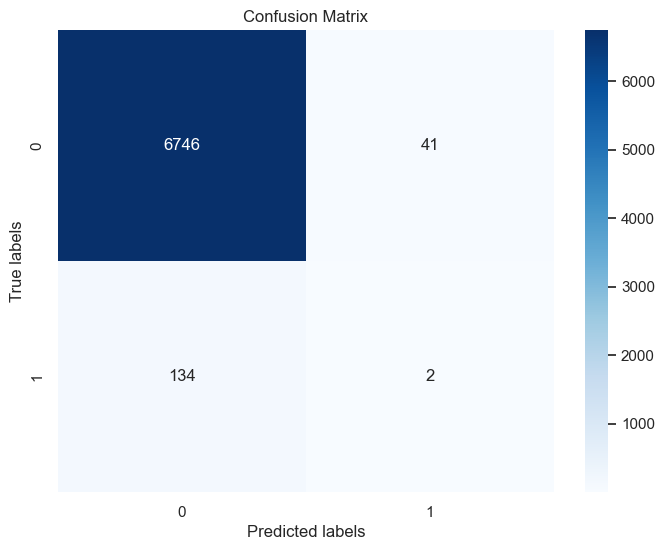

In [ ]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting

# Train the ensemble
ensemble.fit(X_train_over, y_train_over)

# Predict on the test set
y_pred = ensemble.predict(X_test_sc)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## STACKING СТЕКИНГ 2

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.84      0.91      6787
           1       0.07      0.61      0.13       136

    accuracy                           0.84      6923
   macro avg       0.53      0.72      0.52      6923
weighted avg       0.97      0.84      0.89      6923

Confusion Matrix:
[[5699 1088]
 [  53   83]]


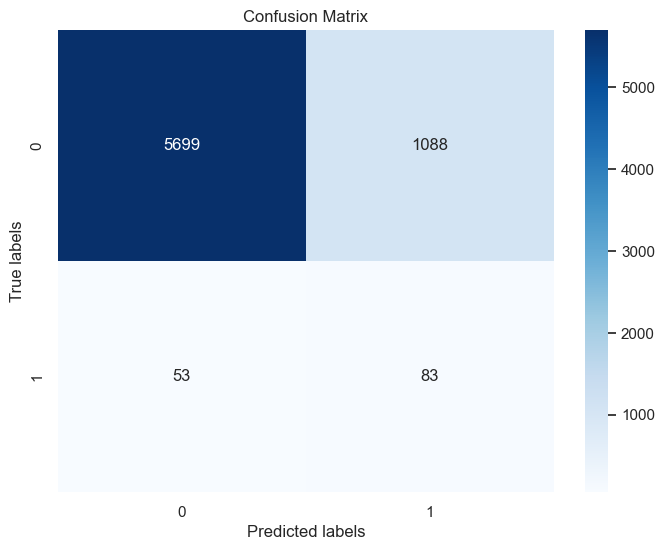

In [ ]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Обучение модели ансамбля
ensemble.fit(X_train_over, y_train_over)

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Random Undersampling

In [ ]:
list_of_models = [
        CatBoostClassifier(),#boosting
        AdaBoostClassifier(),#boosting
        XGBClassifier(),#boosting
        LGBMClassifier(),#boosting
        GradientBoostingClassifier()] #boosting

#Эта строка создает список имен моделей в list_of_models.
#Для каждой модели x в list_of_models она использует функцию type(x).__name__, которая возвращает строковое имя класса объекта.
#Например, если модель - CatBoostClassifier(), type(x).__name__ вернет строку 'CatBoostClassifier'.
list_of_model_names = [type(x).__name__ for x in list_of_models]

cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1'])

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

for model in list_of_models:
    cv_result = cross_validate(
        estimator=model,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1)

    cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

cv_results

fit_time  score_time  accuracy  precision  \
CatBoostClassifier          4.279443    0.008701  0.769901   0.777739   
AdaBoostClassifier          0.091602    0.011600  0.740941   0.748827   
XGBClassifier               0.172833    0.005000  0.734079   0.737689   
LGBMClassifier              0.629500    0.006501  0.758950   0.763315   
GradientBoostingClassifier  0.186103    0.004698  0.748970   0.756885   

                              recall        f1  
CatBoostClassifier          0.769745  0.768005  
AdaBoostClassifier          0.740804  0.738507  
XGBClassifier               0.733941  0.732914  
LGBMClassifier              0.758843  0.757883  
GradientBoostingClassifier  0.748804  0.746813

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      6787
           1       0.05      0.84      0.10       136

    accuracy                           0.70      6923
   macro avg       0.52      0.77      0.46      6923
weighted avg       0.98      0.70      0.81      6923

Confusion Matrix:
[[4755 2032]
 [  22  114]]


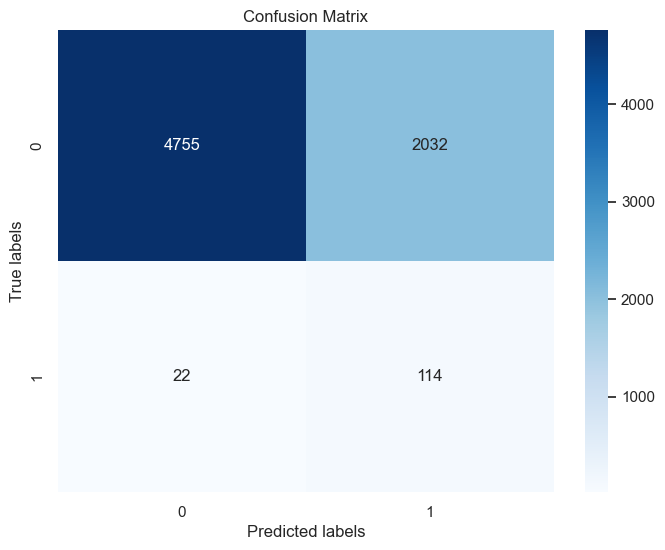

In [47]:
# Обучение модели ансамбля
cat_model = CatBoostClassifier(verbose=False).fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = cat_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# List of base classifiers
base_classifiers = [
    RandomForestClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
]

# List of model names
list_of_model_names = [type(x).__name__ for x in base_classifiers]

# DataFrame to store results
cv_results = pd.DataFrame(
    data=0.0,
    index=list_of_model_names,
    columns=['fit_time', 'score_time', 'accuracy', 'precision', 'recall', 'f1']
)

# Scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Loop through each base classifier, perform cross-validation, and store results in the DataFrame
for model, model_name in zip(base_classifiers, list_of_model_names):
    bagging = BaggingClassifier(base_estimator=model)
    cv_result = cross_validate(
        estimator=bagging,
        X=X_train_under,
        y=y_train_under,
        scoring=scoring,
        cv=10,
        n_jobs=-1
    )

    cv_results.loc[model_name] = list(map(np.mean, cv_result.values()))

cv_results

fit_time  score_time  accuracy  precision    recall  \
RandomForestClassifier  1.992305    0.072500  0.772871   0.780865  0.772706   
SVC                     0.114996    0.039606  0.766911   0.772646  0.766765   
DecisionTreeClassifier  0.045886    0.006421  0.734030   0.736487  0.733863   
KNeighborsClassifier    0.009271    0.205299  0.720050   0.723580  0.719882   

                              f1  
RandomForestClassifier  0.770889  
SVC                     0.765536  
DecisionTreeClassifier  0.733037  
KNeighborsClassifier    0.718890

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      6787
           1       0.05      0.81      0.10       136

    accuracy                           0.71      6923
   macro avg       0.52      0.76      0.46      6923
weighted avg       0.98      0.71      0.81      6923

Confusion Matrix:
[[4790 1997]
 [  26  110]]


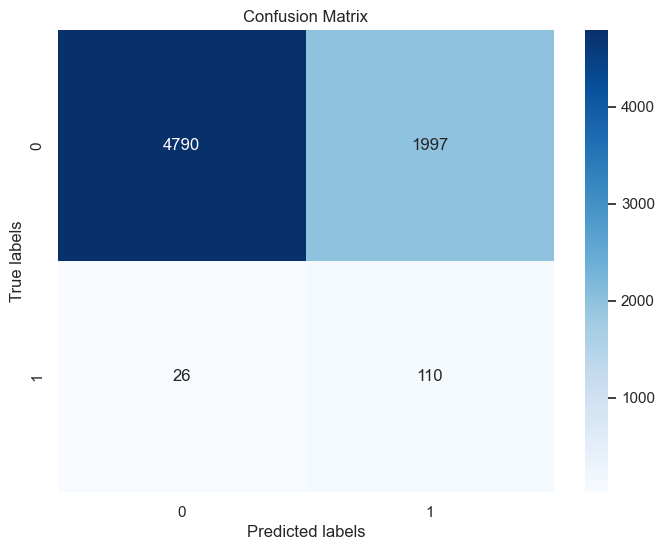

In [53]:
# Обучение модели ансамбля
forest_model = RandomForestClassifier().fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = forest_model.predict(X_test_sc)

# Вывод отчета по метрикам классификации
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84      6787
           1       0.05      0.77      0.10       136

    accuracy                           0.73      6923
   macro avg       0.52      0.75      0.47      6923
weighted avg       0.98      0.73      0.83      6923

Confusion Matrix:
[[4951 1836]
 [  31  105]]


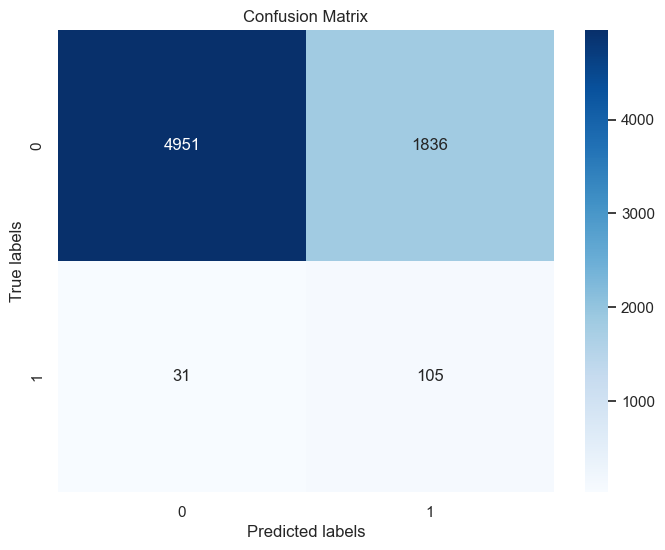

In [ ]:
# Create base models
model_1 = RandomForestClassifier(n_estimators=100, random_state=42)
model_2 = SVC()
model_3 = DecisionTreeClassifier()
model_4 = KNeighborsClassifier()

# Create an ensemble using VotingClassifier
ensemble = EnsembleVoteClassifier(clfs=[model_1,model_2,model_3,model_4],voting='hard')  # 'hard' voting combines predictions by majority voting


# Train the ensemble
ensemble.fit(X_train_under, y_train_under)

# Predict on the test set
y_pred = ensemble.predict(X_test_sc)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.70      0.82      6787
           1       0.05      0.85      0.10       136

    accuracy                           0.70      6923
   macro avg       0.52      0.77      0.46      6923
weighted avg       0.98      0.70      0.81      6923

Confusion Matrix:
[[4733 2054]
 [  21  115]]


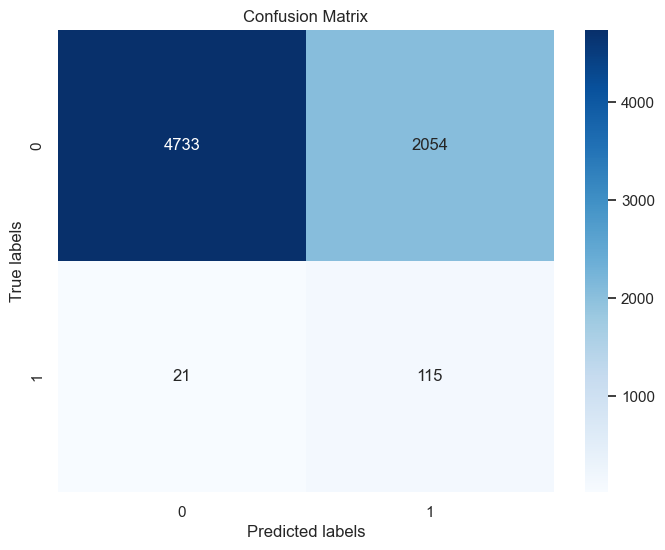

In [ ]:
 #Создание базовых моделей
model1 = GradientBoostingClassifier(n_estimators=100, random_state=42)
model2 = AdaBoostClassifier(n_estimators=100, random_state=42)
model3 = XGBClassifier(n_estimators=100, random_state=42)
model4 = LGBMClassifier(n_estimators=100, random_state=42, verbose=-1)
model5 = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Создание объекта EnsembleVoteClassifier
ensemble = EnsembleVoteClassifier(clfs=[model1, model2, model3, model4, model5])

# Обучение модели ансамбля
ensemble.fit(X_train_under, y_train_under)

# Предсказание на тестовой выборке
y_pred = ensemble.predict(X_test_sc)

## Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Get confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Confusion matrix
print("Confusion Matrix:")
# Get confusion matrix
print(conf_matrix)
# Plotting heatmap for confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set labels, title, and show plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()